<a href="https://colab.research.google.com/github/illliyas/Machine-Learning/blob/master/ekAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of German Loan Application

### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pytz
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import re

### Reading the data

In [3]:
df = pd.read_csv('loan_data_track1.csv')

In [4]:
df.head()

,checking_status,duration,loan_history,purpose,loan_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_loans,job,num_dependents,own_telephone,foreign_worker,accepted
0,<0DM,6,Critical_acct_other_loans_existing,radio/television,1169,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,4,real_estate,67,none,own,m22,skilled_employee/official,1,Yes,yes,2
1,0_to_200DM,48,Existing_loans_paid_till_now,radio/television,5951,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,2,real_estate,22,none,own,e1,skilled_employee/official,1,No,yes,1
2,None,12,Critical_acct_other_loans_existing,education,2096,<100DM,4_to_7yrs,2,male_single,None,3,real_estate,49,none,own,1,unskilled_resident,2,No,yes,2
3,<0DM,42,Existing_loans_paid_till_now,furniture/equipment,7882,<100DM,4_to_7yrs,2,male_single,guarantor,4,building_society_savings_agreement/life_insurance,45,none,for_free,q1,skilled_employee/official,2,No,yes,2
4,<0DM,24,Delay_in_past,new_car,4870,<100DM,1_to_4yrs,3,male_single,None,4,unknown/no_property,53,none,for_free,p22,skilled_employee/official,2,No,yes,1


### Missing Data Check

#### Verify the percentage of null values in each column

In [5]:
(df.isnull().sum()/len(df))*100

checking_status           0.0
duration                  0.0
loan_history              0.0
purpose                   0.0
loan_amount               0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_loans            0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
accepted                  0.0
dtype: float64

No missing data identified

#### Altering the Accepetd variable to represent 0 as Rejected and 1 as Accepted

In [6]:
df['accepted'] = df['accepted'].apply(lambda x: 'Rejected' if x==1 else 'Accepted')

### Data Exploration

In [ ]:
df.head()

,checking_status,duration,loan_history,purpose,loan_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_loans,job,num_dependents,own_telephone,foreign_worker,accepted
0,<0DM,6,Critical_acct_other_loans_existing,radio/television,1169,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,...,real_estate,67,none,own,m22,skilled_employee/official,1,Yes,yes,Rejected
1,0_to_200DM,48,Existing_loans_paid_till_now,radio/television,5951,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,...,real_estate,22,none,own,e1,skilled_employee/official,1,No,yes,Accepted
2,None,12,Critical_acct_other_loans_existing,education,2096,<100DM,4_to_7yrs,2,male_single,None,...,real_estate,49,none,own,1,unskilled_resident,2,No,yes,Rejected
3,<0DM,42,Existing_loans_paid_till_now,furniture/equipment,7882,<100DM,4_to_7yrs,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45,none,for_free,q1,skilled_employee/official,2,No,yes,Rejected
4,<0DM,24,Delay_in_past,new_car,4870,<100DM,1_to_4yrs,3,male_single,None,...,unknown/no_property,53,none,for_free,p22,skilled_employee/official,2,No,yes,Accepted


#### Extracting Gender and marital_status  from personal_status

In [ ]:
df['personal_status'].unique()

array(['male_single', 'female_divorced/separated/married',
       'male_divorced/separated', 'male_married/widowed'], dtype=object)

In [ ]:
df['gender'] = df['personal_status'].apply(lambda x: x.split('_')[0])

In [ ]:
df['gender']

0        male
1      female
2        male
3        male
4        male
        ...  
995    female
996      male
997      male
998      male
999      male
Name: gender, Length: 1000, dtype: object

In [ ]:
df['marital_status'] = df['personal_status'].apply(lambda x: x.split('_')[1])

In [ ]:
df['marital_status']

0                          single
1      divorced/separated/married
2                          single
3                          single
4                          single
                  ...            
995    divorced/separated/married
996            divorced/separated
997                        single
998                        single
999                        single
Name: marital_status, Length: 1000, dtype: object

#### Cleaning  existing_loans lowercase alphabet characters and extracting only numeric

In [ ]:
df['existing_loans'] = df['existing_loans'].apply(lambda x: re.findall(r'\d+', x)[0])

In [ ]:
df['existing_loans']

0      22
1       1
2       1
3       1
4      22
       ..
995     1
996     1
997     1
998     1
999     1
Name: existing_loans, Length: 1000, dtype: object

### 3. Univariate Plots & analysis 

In [ ]:
sns.set_style("darkgrid")

#### Analysing the Target variable "accepted"

In [ ]:
sns.set()

In [ ]:
accepted_rate = df['accepted'].value_counts(normalize=True)

<AxesSubplot:>

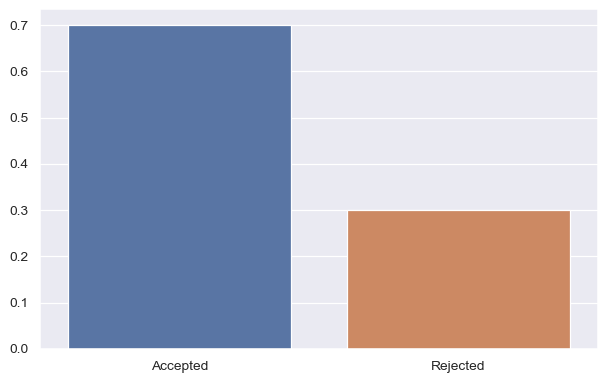

In [ ]:
f, ax = plt.subplots(figsize=(8,5), dpi=90)
sns.barplot(x=accepted_rate.index, y=accepted_rate.values, ax=ax)

70% Loans are accepted and 30% are Rejected. This is a class-imbalance dataset.

## 3.a Univariate Analysis of driving factors/ influencers

In [ ]:
def setLabels(plot, xLabel, yLabel, title):
    plt.ylabel(yLabel, fontsize=18)
    plt.xlabel(xLabel, fontsize=18)
    plt.setp(plot.get_xticklabels(), fontsize=14)
    plt.setp(plot.get_yticklabels(), fontsize=14)
    plot.set_title(title, fontsize=20)

In [ ]:
def createCountPlot(varName, xLabel, yLabel, title):
    count_plot = sns.countplot(varName, hue='accepted',data=df)
    setLabels(count_plot, xLabel, yLabel, title)

In [ ]:
def createPercPlot(varName, xLabel, yLabel, title):
    charge_off_rates = df.groupby(varName)['accepted'].value_counts(normalize=True).loc[:,'Rejected']
    perc_plot = sns.barplot(x=charge_off_rates.reset_index()[varName], y=charge_off_rates.values)
    setLabels(perc_plot, xLabel, yLabel, title)

In [ ]:
def createBarPlot(varName, xLabel, yLabel, title):
    bar_plot = sns.barplot(y=varName, x='accepted',data=loan)
    setLabels(bar_plot, xLabel, yLabel, title)

In [ ]:
def createDistPlot(varName, xLabel, yLabel, title):
    dist_plot = sns.distplot(df[varName])
    setLabels(dist_plot, xLabel, yLabel, title)
    
def createBoxPlot(varName, xLabel, yLabel, title):
    box_plot = sns.boxplot(x=varName,y='accepted',data=df)
    setLabels(box_plot, xLabel, yLabel, title)

### Continuous variable Analysis

(array([0, 1]), [Text(0, 0, 'Accepted'), Text(1, 0, 'Rejected')])

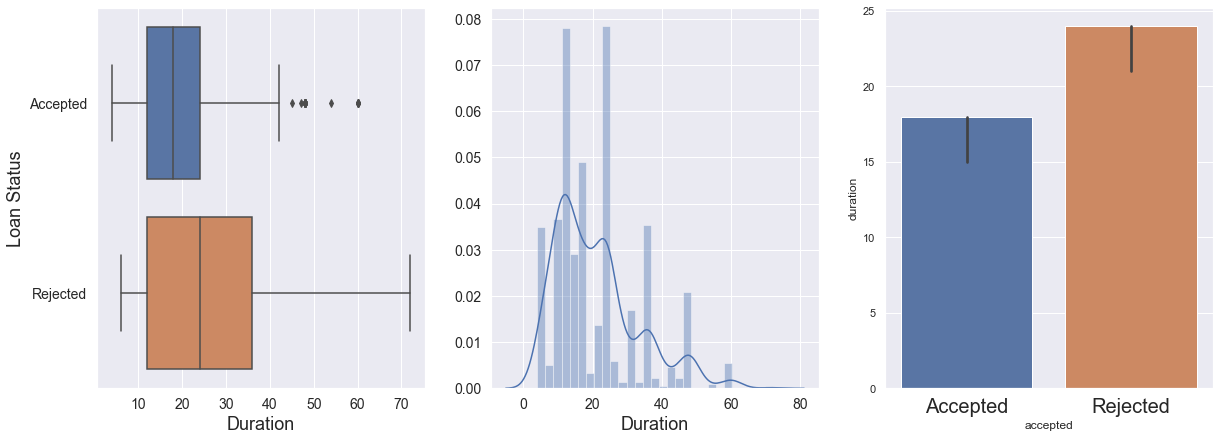

In [ ]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
createBoxPlot('duration', 'Duration', 'Loan Status', '')

plt.subplot(1,3,2)
createDistPlot('duration', 'Duration', '', '')

plt.subplot(1, 3, 3)
sns.barplot(x='accepted', y='duration', data=df, estimator=np.median)
plt.xticks(fontsize=20)

(array([0, 1]), [Text(0, 0, 'Accepted'), Text(1, 0, 'Rejected')])

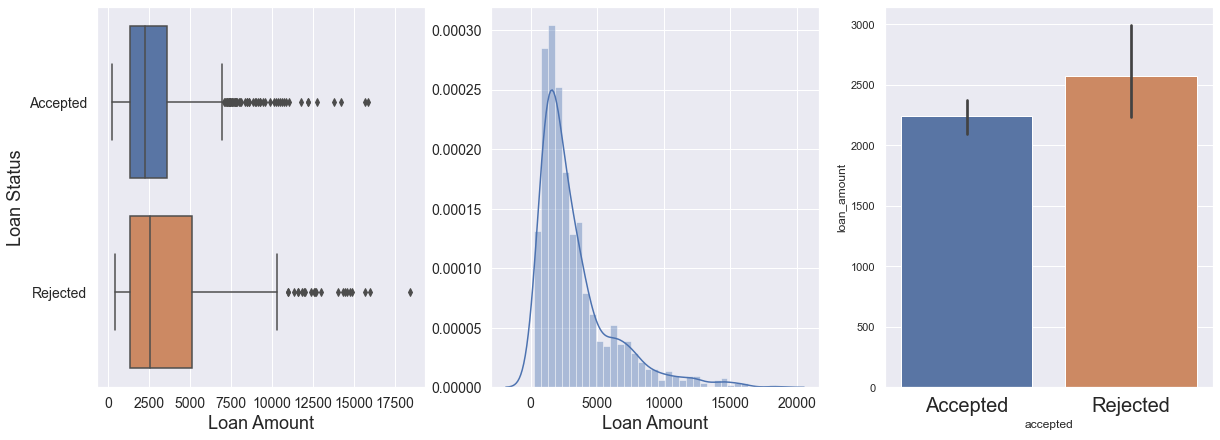

In [ ]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
createBoxPlot('loan_amount', 'Loan Amount', 'Loan Status', '')

plt.subplot(1,3,2)
createDistPlot('loan_amount', 'Loan Amount', '', '')

plt.subplot(1, 3, 3)
sns.barplot(x='accepted', y='loan_amount', data=df, estimator=np.median)
plt.xticks(fontsize=20)

(array([0, 1]), [Text(0, 0, 'Accepted'), Text(1, 0, 'Rejected')])

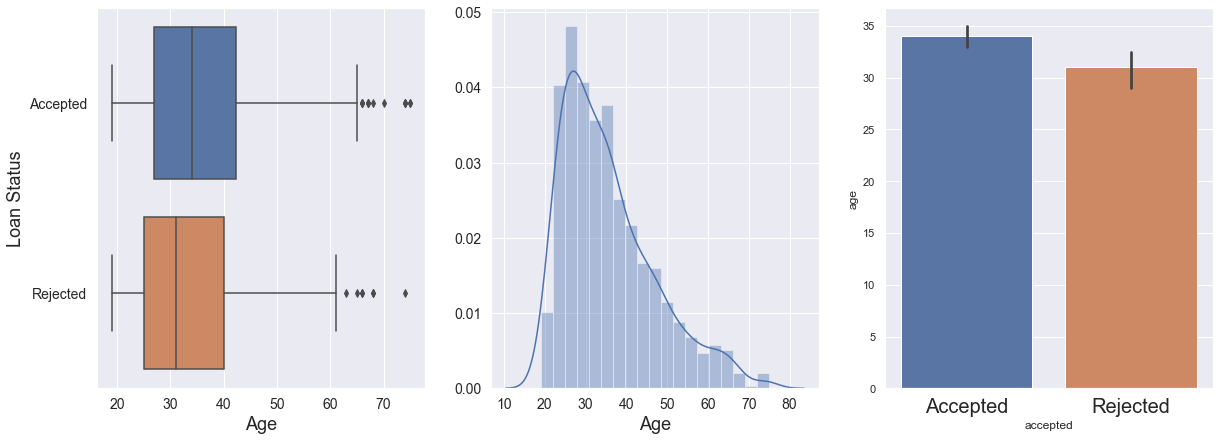

In [ ]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
createBoxPlot('age', 'Age', 'Loan Status', '')
    
plt.subplot(1,3,2)
createDistPlot('age', 'Age', '', '')

plt.subplot(1, 3, 3)
sns.barplot(x='accepted', y='age', data=df, estimator=np.median)
plt.xticks(fontsize=20)

In [ ]:
df['loan_amount'].describe(percentiles=[.95,.97])

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
50%       2319.500000
95%       9162.700000
97%      10961.390000
max      18424.000000
Name: loan_amount, dtype: float64

### Univariate Analysis

In [ ]:
df

,checking_status,duration,loan_history,purpose,loan_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_loans,job,num_dependents,own_telephone,foreign_worker,accepted,gender,marital_status
0,<0DM,6,Critical_acct_other_loans_existing,radio/television,1169,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,...,none,own,22,skilled_employee/official,1,Yes,yes,Accepted,male,single
1,0_to_200DM,48,Existing_loans_paid_till_now,radio/television,5951,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,...,none,own,1,skilled_employee/official,1,No,yes,Rejected,female,divorced/separated/married
2,None,12,Critical_acct_other_loans_existing,education,2096,<100DM,4_to_7yrs,2,male_single,None,...,none,own,1,unskilled_resident,2,No,yes,Accepted,male,single
3,<0DM,42,Existing_loans_paid_till_now,furniture/equipment,7882,<100DM,4_to_7yrs,2,male_single,guarantor,...,none,for_free,1,skilled_employee/official,2,No,yes,Accepted,male,single
4,<0DM,24,Delay_in_past,new_car,4870,<100DM,1_to_4yrs,3,male_single,None,...,none,for_free,22,skilled_employee/official,2,No,yes,Rejected,male,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,None,12,Existing_loans_paid_till_now,furniture/equipment,1736,<100DM,4_to_7yrs,3,female_divorced/separated/married,None,...,none,own,1,unskilled_resident,1,No,yes,Accepted,female,divorced/separated/married
996,<0DM,30,Existing_loans_paid_till_now,used_car,3857,<100DM,1_to_4yrs,4,male_divorced/separated,None,...,none,own,1,management_self-employed_highly_qualified/officer,1,Yes,yes,Accepted,male,divorced/separated
997,None,12,Existing_loans_paid_till_now,radio/television,804,<100DM,>7yrs,4,male_single,None,...,none,own,1,skilled_employee/official,1,No,yes,Accepted,male,single
998,<0DM,45,Existing_loans_paid_till_now,radio/television,1845,<100DM,1_to_4yrs,4,male_single,None,...,none,for_free,1,skilled_employee/official,1,Yes,yes,Rejected,male,single


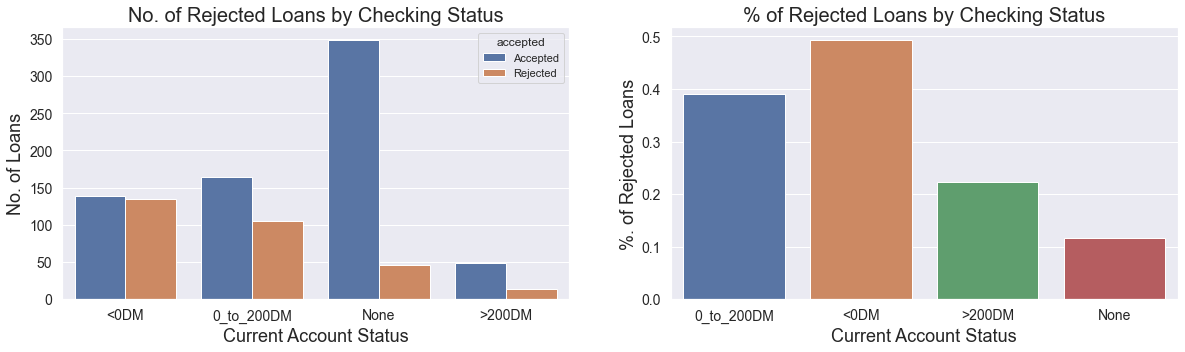

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
createCountPlot('checking_status', 'Current Account Status', 'No. of Loans', 'No. of Rejected Loans by Checking Status')

plt.subplot(1,2,2)
createPercPlot('checking_status', 'Current Account Status', '%. of Rejected Loans', '% of Rejected Loans by Checking Status')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Critical_acct_other_loans_existing'),
  Text(1, 0, 'Existing_loans_paid_till_now'),
  Text(2, 0, 'Delay_in_past'),
  Text(3, 0, 'No_loans_taken_or_all_paid'),
  Text(4, 0, 'All_loans_paid_duly')])

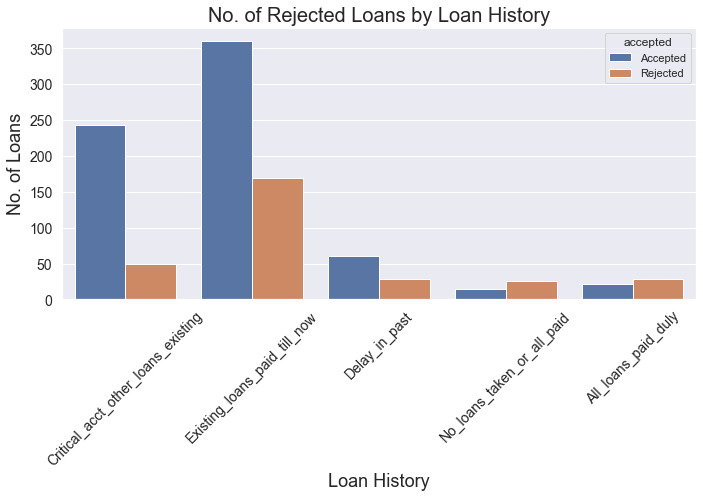

In [ ]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
createCountPlot('loan_history', 'Loan History', 'No. of Loans', 'No. of Rejected Loans by Loan History')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'All_loans_paid_duly'),
  Text(1, 0, 'Critical_acct_other_loans_existing'),
  Text(2, 0, 'Delay_in_past'),
  Text(3, 0, 'Existing_loans_paid_till_now'),
  Text(4, 0, 'No_loans_taken_or_all_paid')])

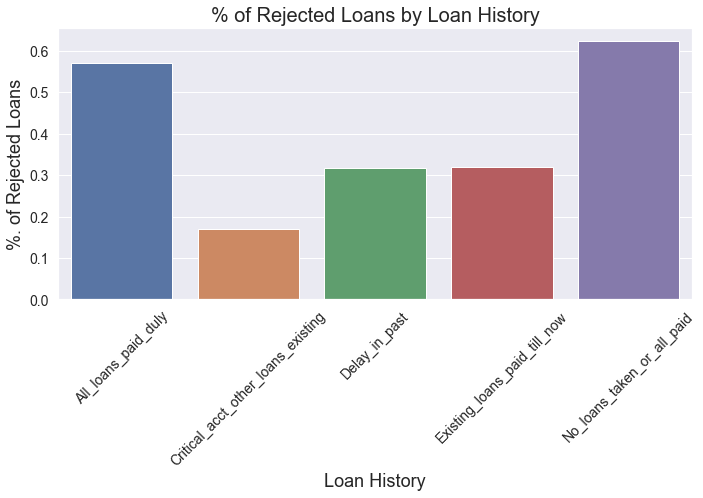

In [ ]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,2)
createPercPlot('loan_history', 'Loan History', '%. of Rejected Loans', '% of Rejected Loans by Loan History')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radio/television'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'new_car'),
  Text(4, 0, 'used_car'),
  Text(5, 0, 'business'),
  Text(6, 0, 'domestic_appliances'),
  Text(7, 0, 'repairs'),
  Text(8, 0, 'other'),
  Text(9, 0, 'retraining')])

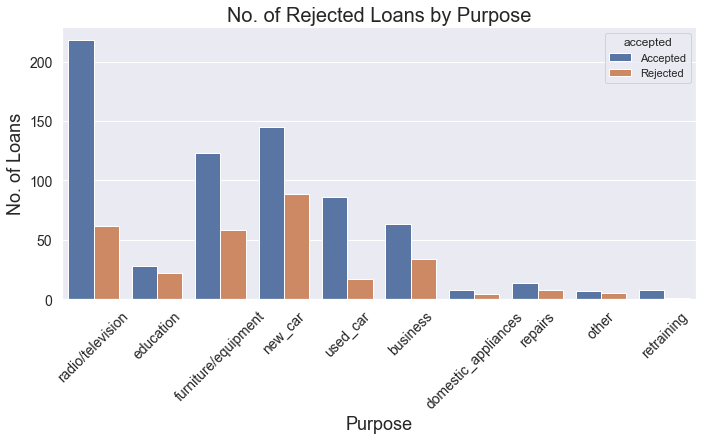

In [ ]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
createCountPlot('purpose', 'Purpose', 'No. of Loans', 'No. of Rejected Loans by Purpose')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'business'),
  Text(1, 0, 'domestic_appliances'),
  Text(2, 0, 'education'),
  Text(3, 0, 'furniture/equipment'),
  Text(4, 0, 'new_car'),
  Text(5, 0, 'other'),
  Text(6, 0, 'radio/television'),
  Text(7, 0, 'repairs'),
  Text(8, 0, 'retraining'),
  Text(9, 0, 'used_car')])

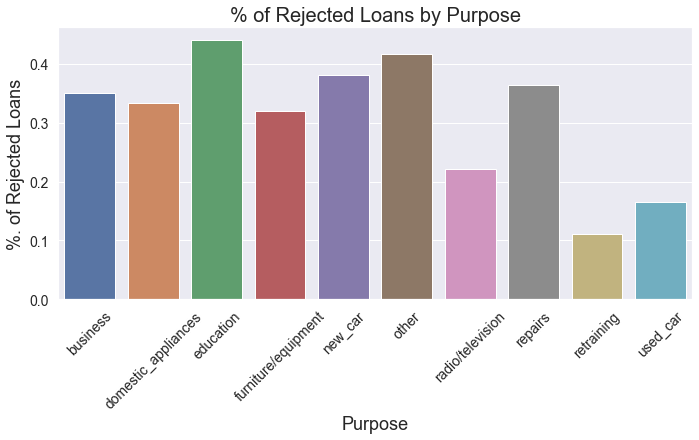

In [ ]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,2)
createPercPlot('purpose', 'Purpose', '%. of Rejected Loans', '% of Rejected Loans by Purpose')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Unknown_or_no_savings_acct'),
  Text(1, 0, '<100DM'),
  Text(2, 0, '500_to_1000DM'),
  Text(3, 0, '>1000DM'),
  Text(4, 0, '100_to_500DM')])

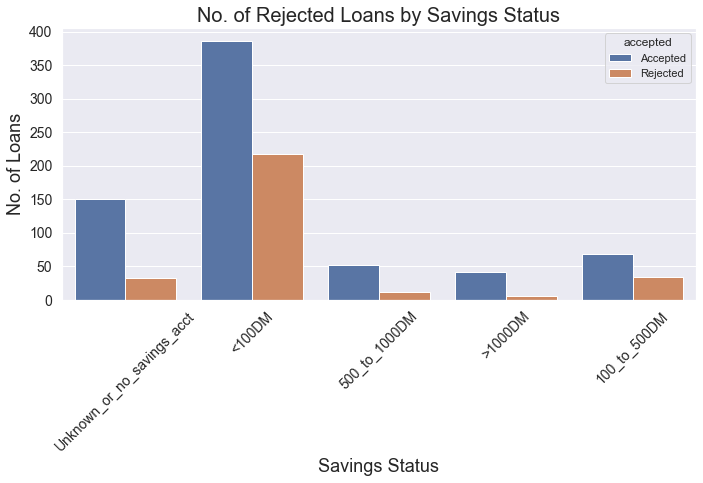

In [ ]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
createCountPlot('savings_status', 'Savings Status', 'No. of Loans', 'No. of Rejected Loans by Savings Status')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '100_to_500DM'),
  Text(1, 0, '500_to_1000DM'),
  Text(2, 0, '<100DM'),
  Text(3, 0, '>1000DM'),
  Text(4, 0, 'Unknown_or_no_savings_acct')])

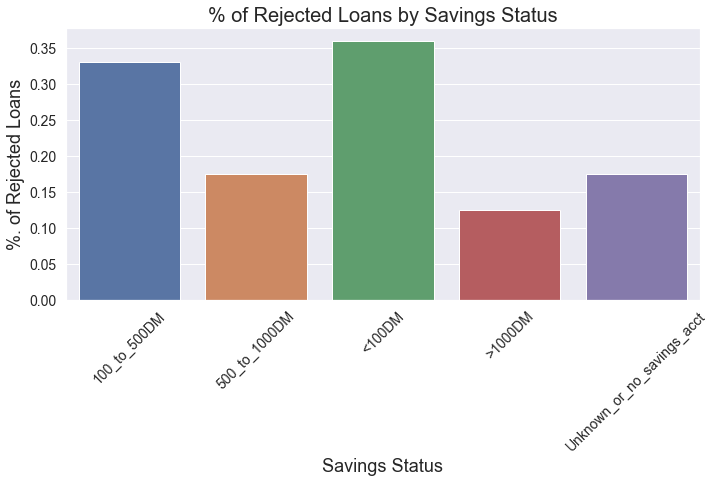

In [ ]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,2)
createPercPlot('savings_status', 'Savings Status', '%. of Rejected Loans', '% of Rejected Loans by Savings Status')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1_to_4yrs'),
  Text(1, 0, '4_to_7yrs'),
  Text(2, 0, '<1yr'),
  Text(3, 0, '>7yrs'),
  Text(4, 0, 'unemployed')])

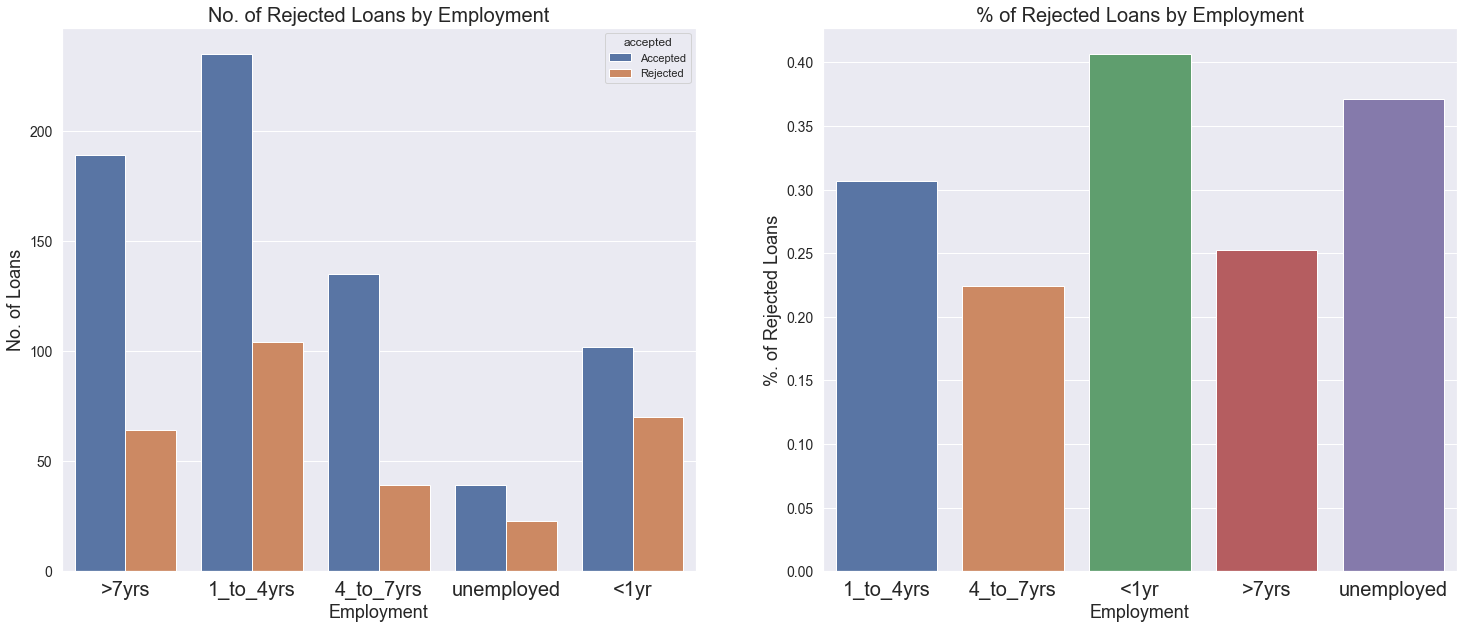

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('employment', 'Employment', 'No. of Loans', 'No. of Rejected Loans by Employment')
plt.xticks(fontsize=20)

plt.subplot(1,2,2)
createPercPlot('employment', 'Employment', '%. of Rejected Loans', '% of Rejected Loans by Employment')
plt.xticks(fontsize=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

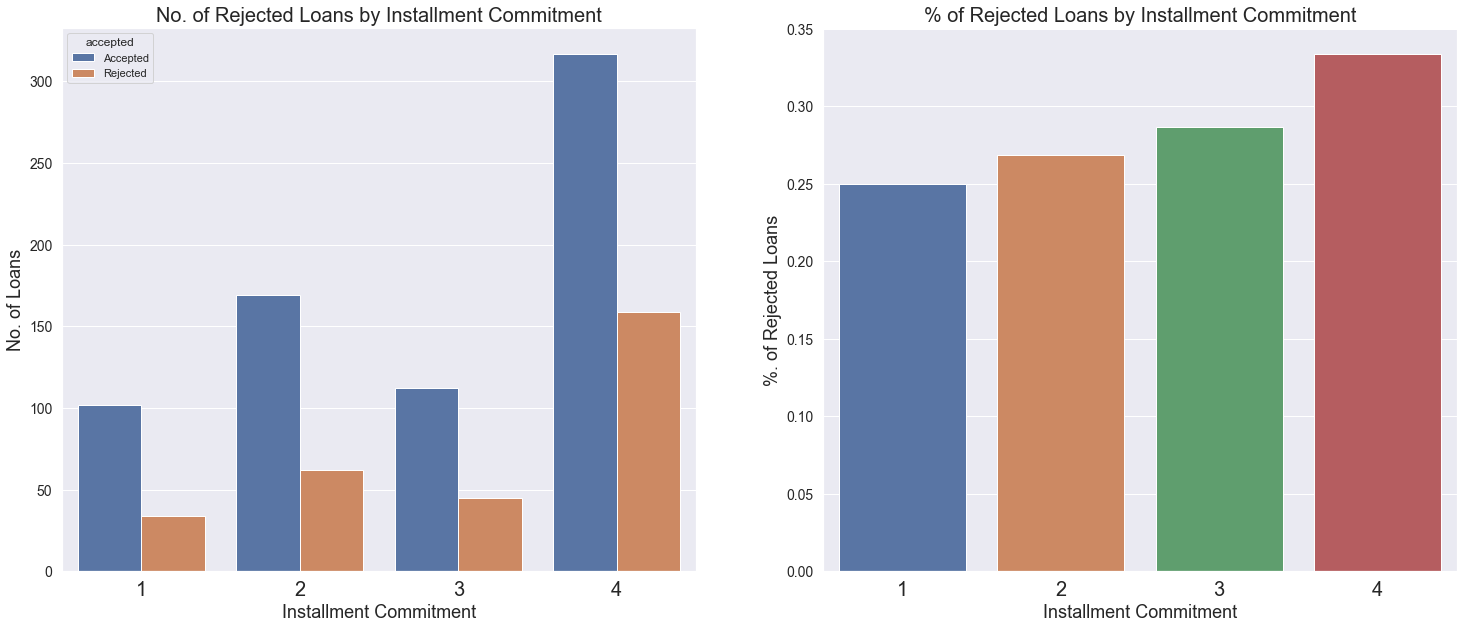

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('installment_commitment', 'Installment Commitment', 'No. of Loans', 'No. of Rejected Loans by Installment Commitment')
plt.xticks(fontsize=20)

plt.subplot(1,2,2)
createPercPlot('installment_commitment', 'Installment Commitment', '%. of Rejected Loans', '% of Rejected Loans by Installment Commitment')
plt.xticks(fontsize=20)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

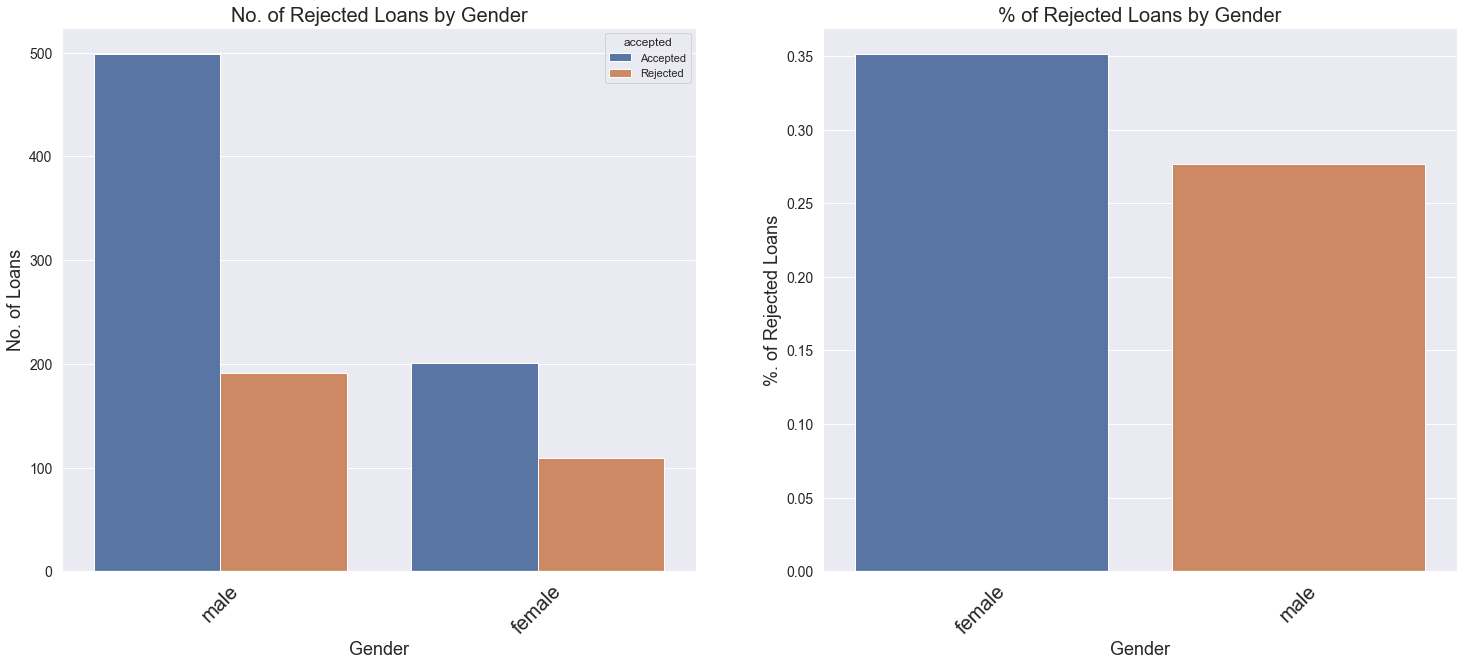

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('gender', 'Gender', 'No. of Loans', 'No. of Rejected Loans by Gender')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('gender', 'Gender', '%. of Rejected Loans', '% of Rejected Loans by Gender')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2]),
 [Text(0, 0, 'divorced/separated'),
  Text(1, 0, 'married/widowed'),
  Text(2, 0, 'single')])

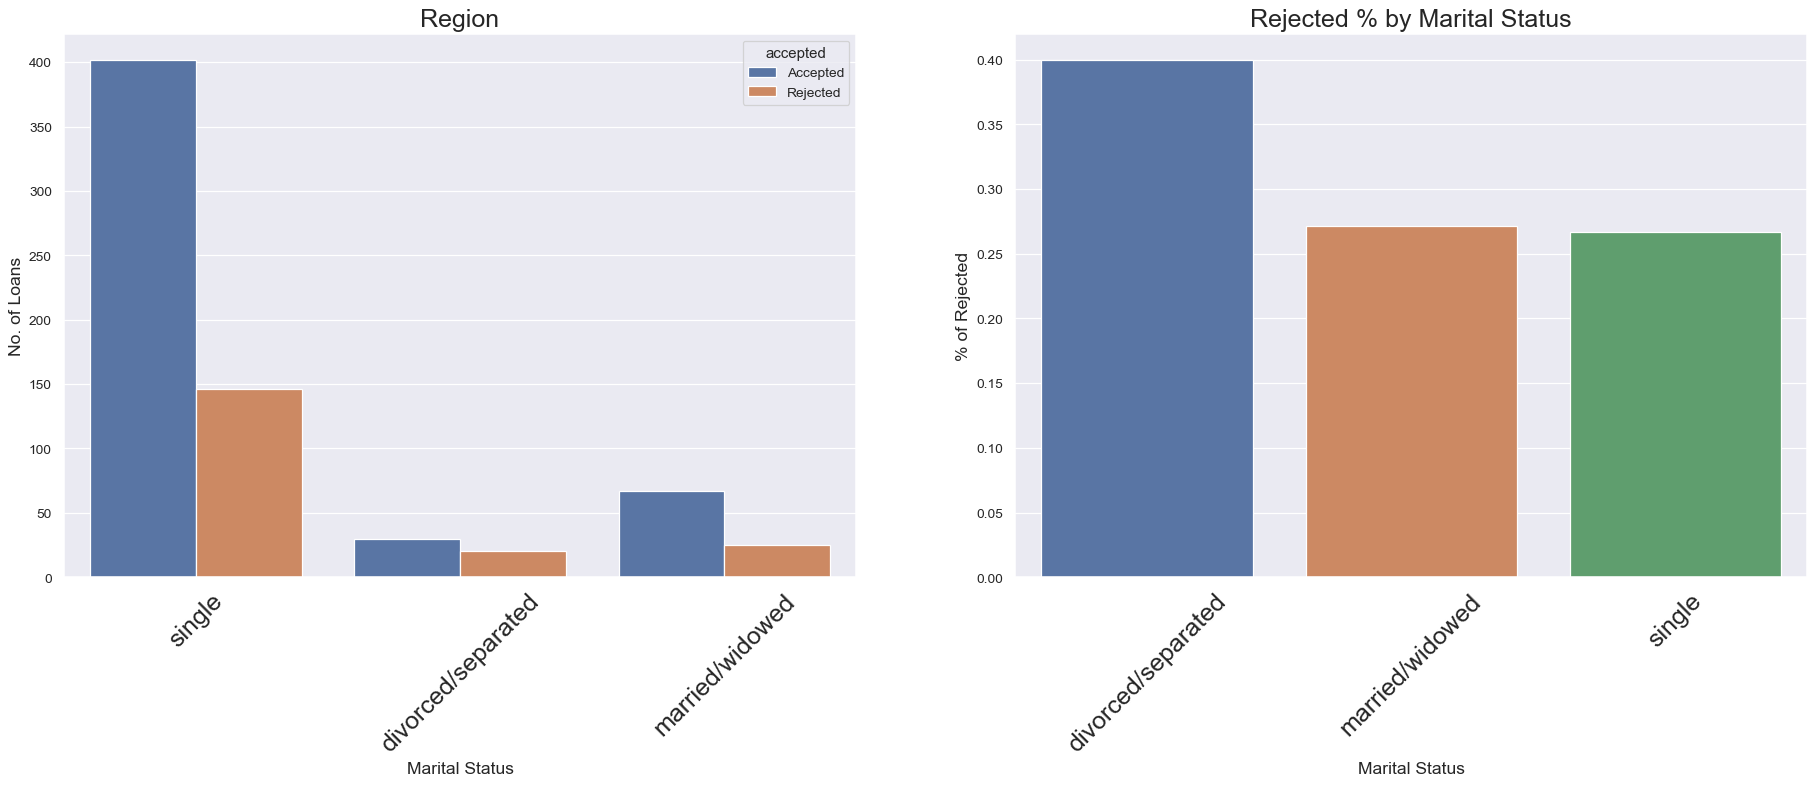

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,8), dpi=90)
sns.countplot('marital_status',hue='accepted',data=df[df['gender']=='male'],ax=ax1)
ax1.set_xlabel('Marital Status', fontsize=14)
ax1.set_ylabel('No. of Loans', fontsize=14)
ax1.set_title('Region', fontsize=20)
charge_off_rates = df[df['gender']=='male'].groupby('marital_status')['accepted'].value_counts(normalize=True).loc[:,'Rejected']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, ax=ax2)
ax2.set_xlabel('Marital Status', fontsize=14)
ax2.set_ylabel('% of Rejected', fontsize=14)
ax2.set_title('Rejected % by Marital Status', fontsize=20)
plt.sca(ax1)
plt.xticks(rotation=45, fontsize=20)
plt.sca(ax2)
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2]),
 [Text(0, 0, 'None'), Text(1, 0, 'co-applicant'), Text(2, 0, 'guarantor')])

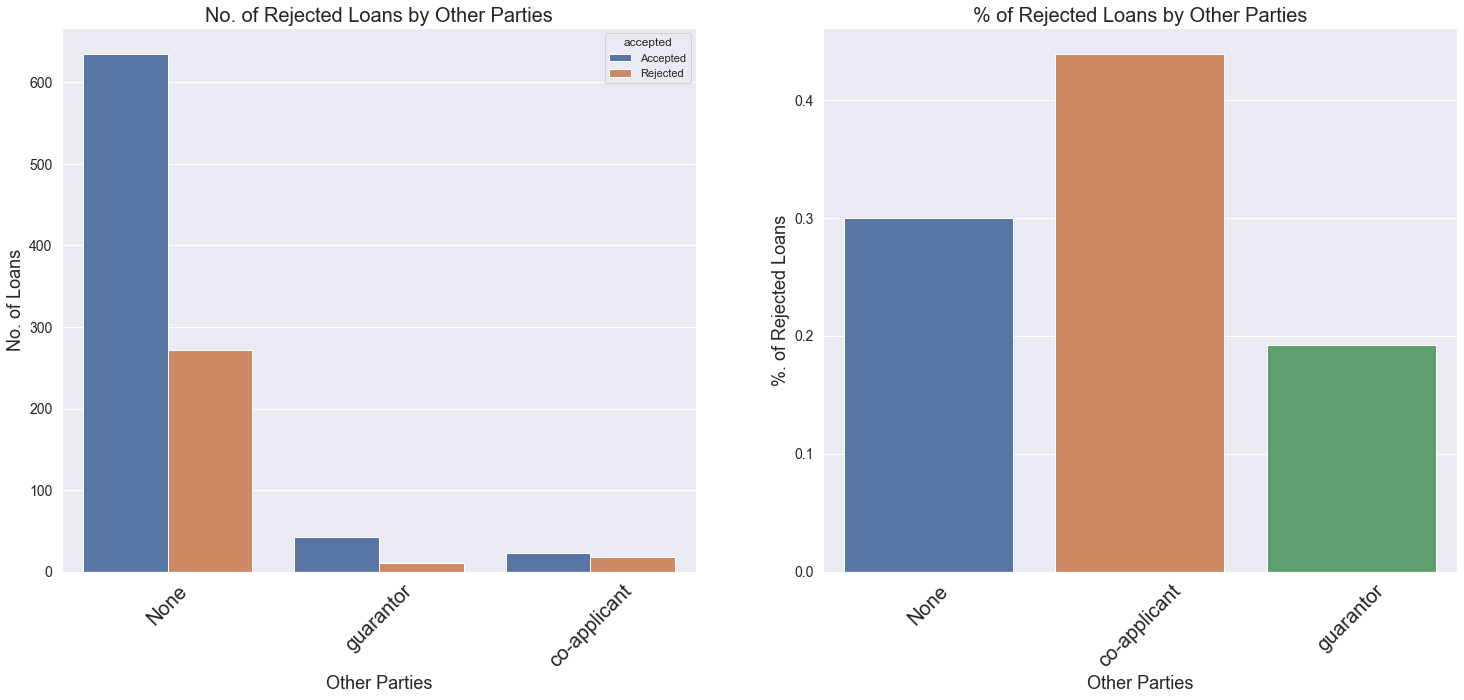

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('other_parties', 'Other Parties', 'No. of Loans', 'No. of Rejected Loans by Other Parties')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('other_parties', 'Other Parties', '%. of Rejected Loans', '% of Rejected Loans by Other Parties')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

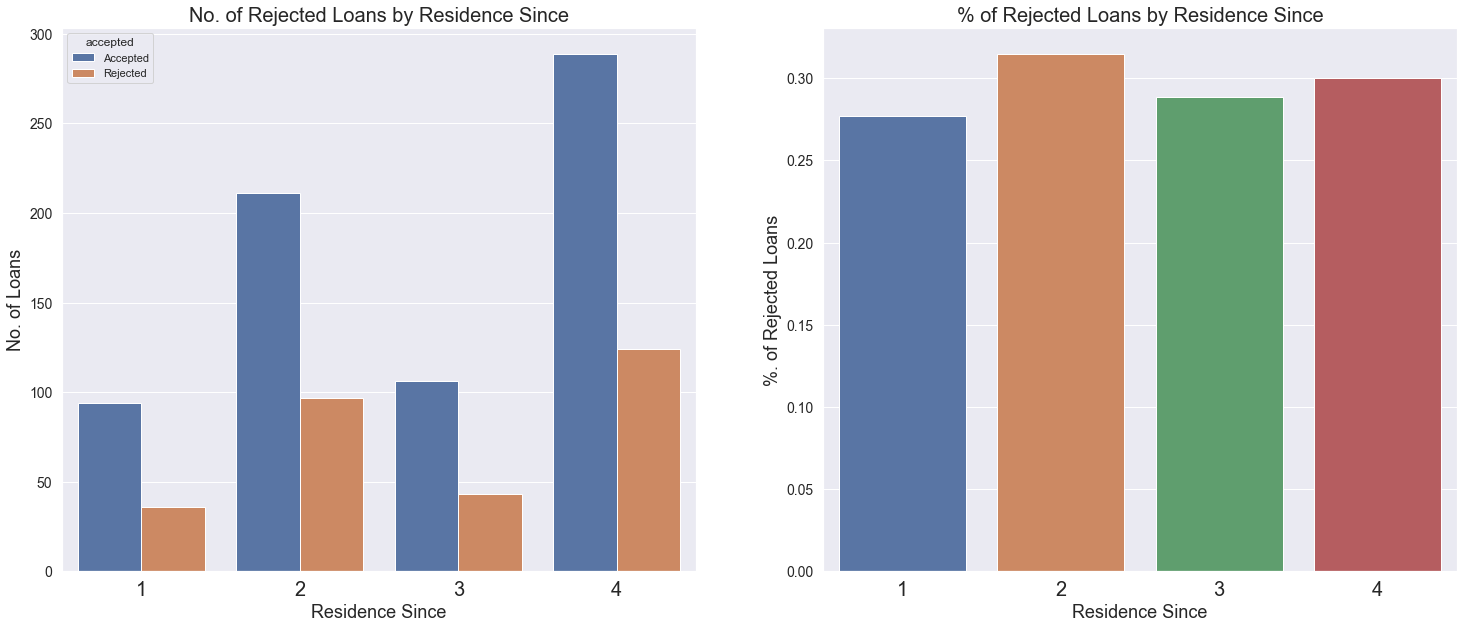

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('residence_since', 'Residence Since', 'No. of Loans', 'No. of Rejected Loans by Residence Since')
plt.xticks(fontsize=20)

plt.subplot(1,2,2)
createPercPlot('residence_since', 'Residence Since', '%. of Rejected Loans', '% of Rejected Loans by Residence Since')
plt.xticks(fontsize=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'building_society_savings_agreement/life_insurance'),
  Text(1, 0, 'car_or_other_nonsavings'),
  Text(2, 0, 'real_estate'),
  Text(3, 0, 'unknown/no_property')])

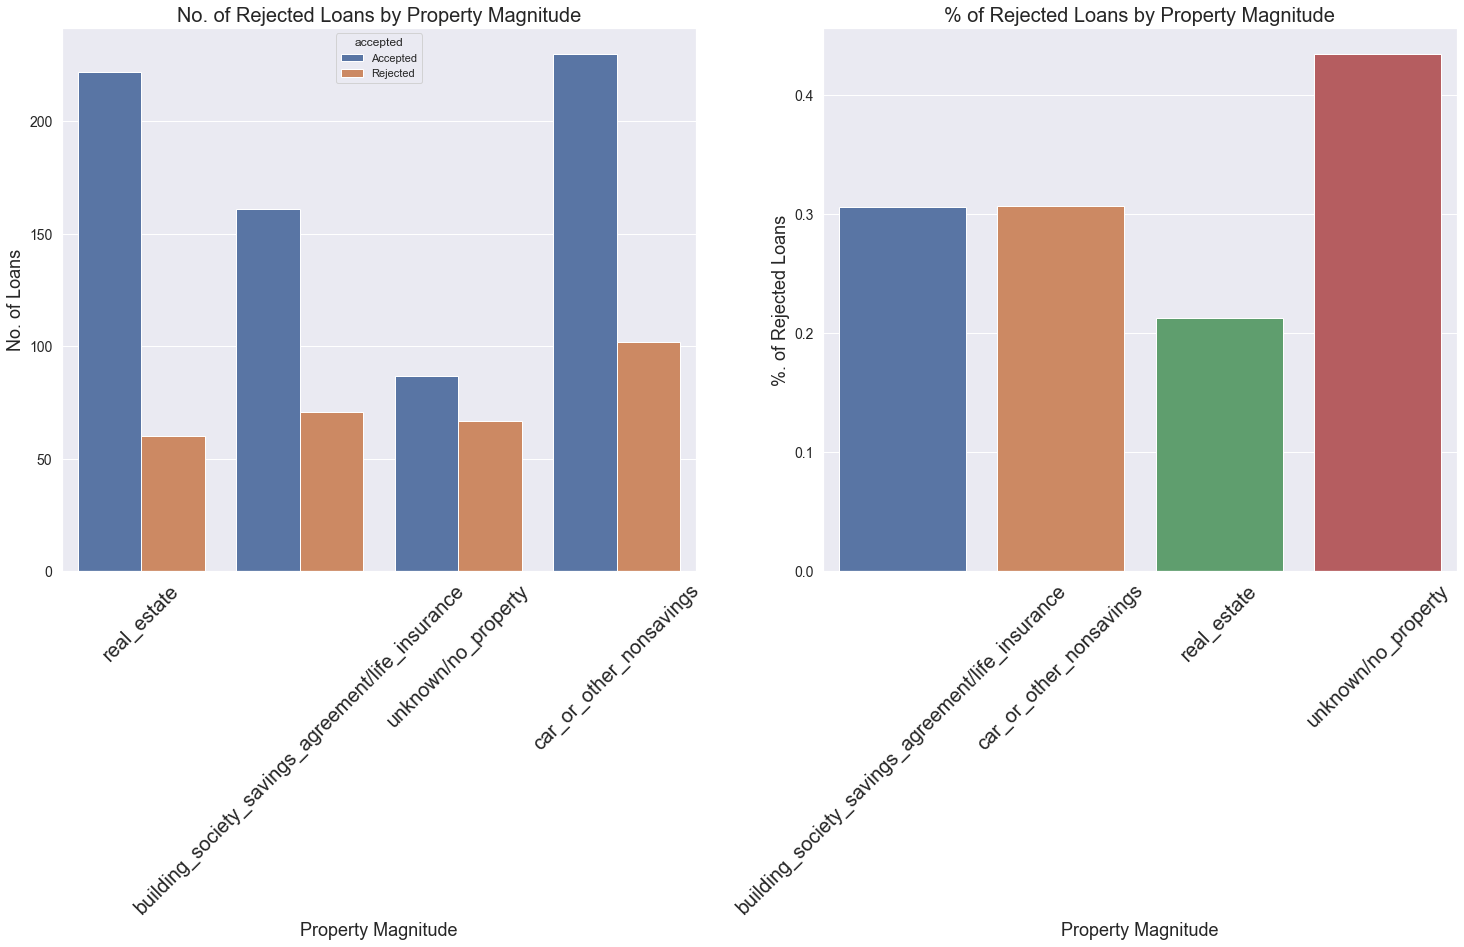

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('property_magnitude', 'Property Magnitude', 'No. of Loans', 'No. of Rejected Loans by Property Magnitude')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('property_magnitude', 'Property Magnitude', '%. of Rejected Loans', '% of Rejected Loans by Property Magnitude')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2]),
 [Text(0, 0, 'for_free'), Text(1, 0, 'own'), Text(2, 0, 'rent')])

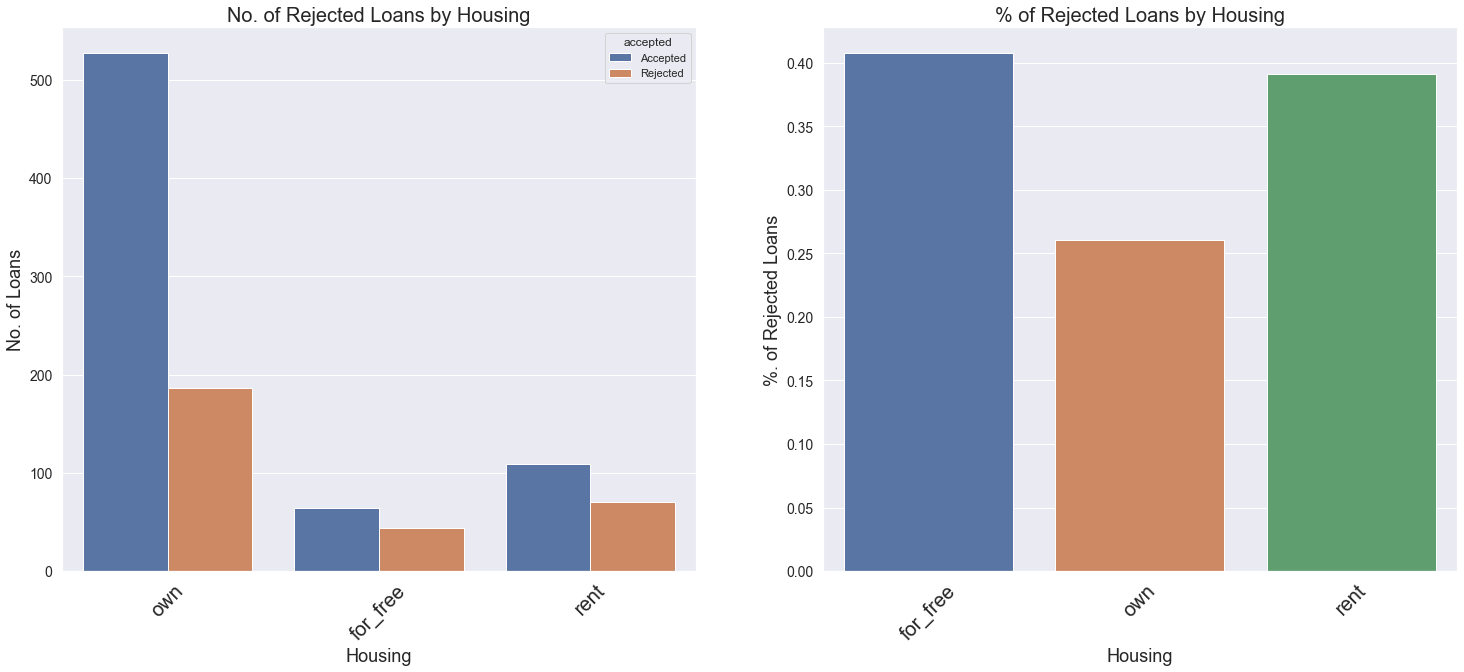

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('housing', 'Housing', 'No. of Loans', 'No. of Rejected Loans by Housing')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('housing', 'Housing', '%. of Rejected Loans', '% of Rejected Loans by Housing')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '22'), Text(2, 0, '333'), Text(3, 0, '4444')])

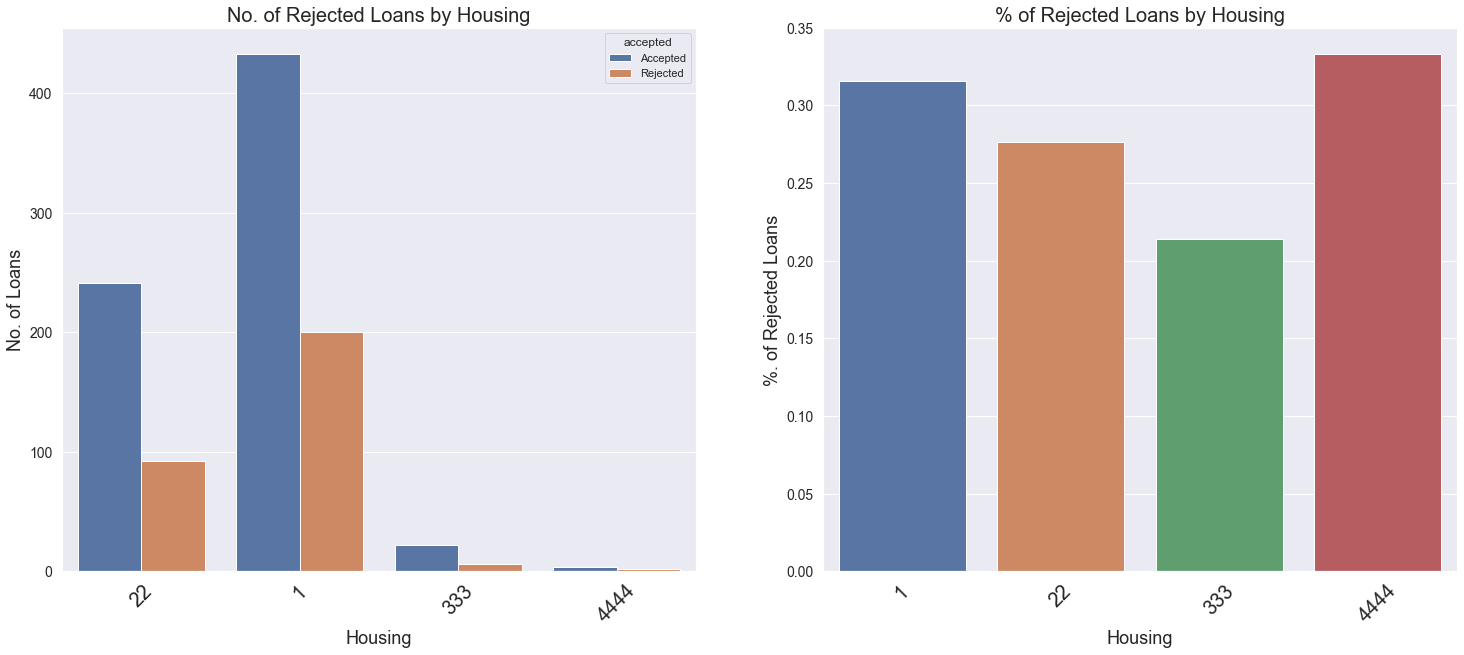

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('existing_loans', 'Housing', 'No. of Loans', 'No. of Rejected Loans by Housing')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('existing_loans', 'Housing', '%. of Rejected Loans', '% of Rejected Loans by Housing')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'management_self-employed_highly_qualified/officer'),
  Text(1, 0, 'skilled_employee/official'),
  Text(2, 0, 'unemployed/unskilled_nonresident'),
  Text(3, 0, 'unskilled_resident')])

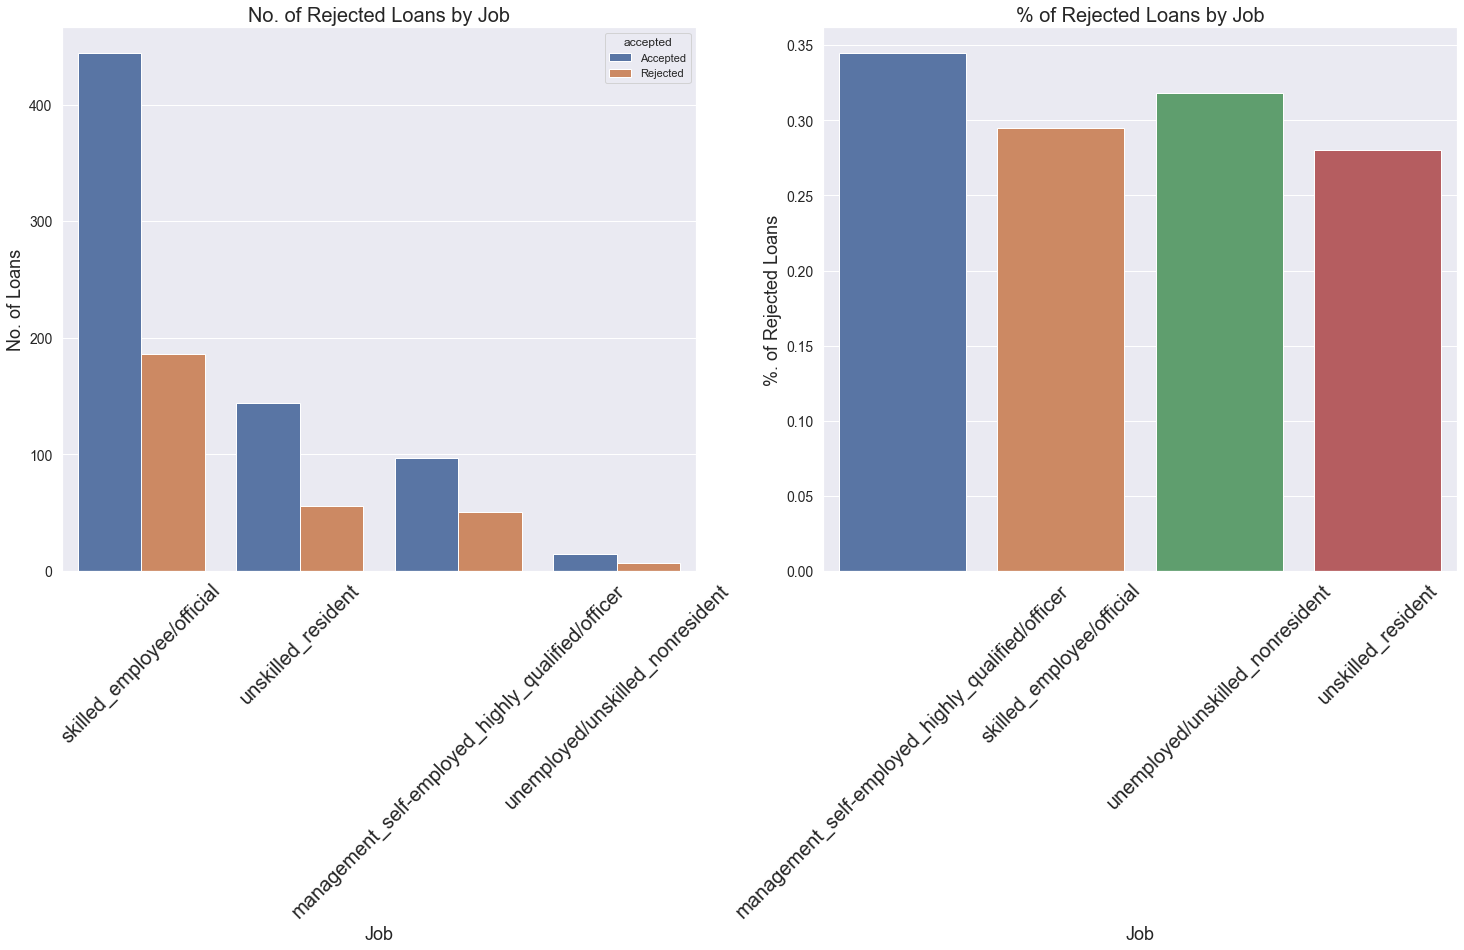

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('job', 'Job', 'No. of Loans', 'No. of Rejected Loans by Job')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('job', 'Job', '%. of Rejected Loans', '% of Rejected Loans by Job')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

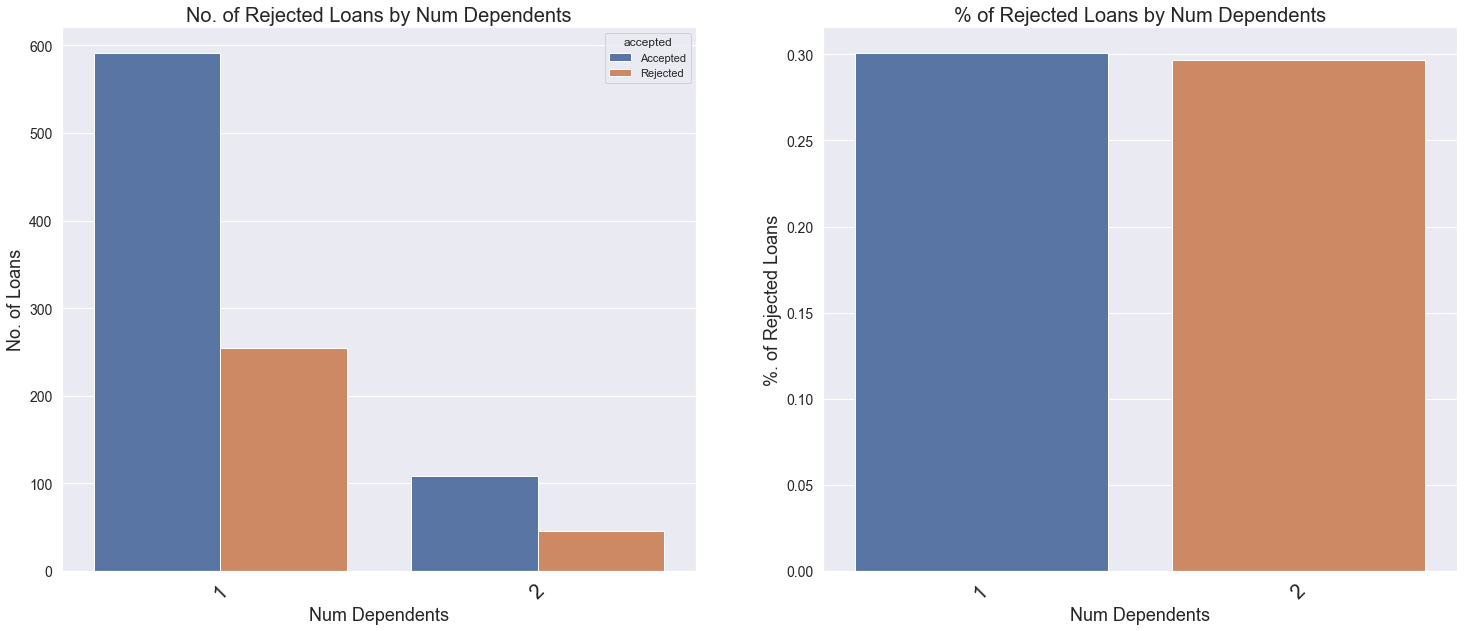

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('num_dependents', 'Num Dependents', 'No. of Loans', 'No. of Rejected Loans by Num Dependents')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('num_dependents', 'Num Dependents', '%. of Rejected Loans', '% of Rejected Loans by Num Dependents')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

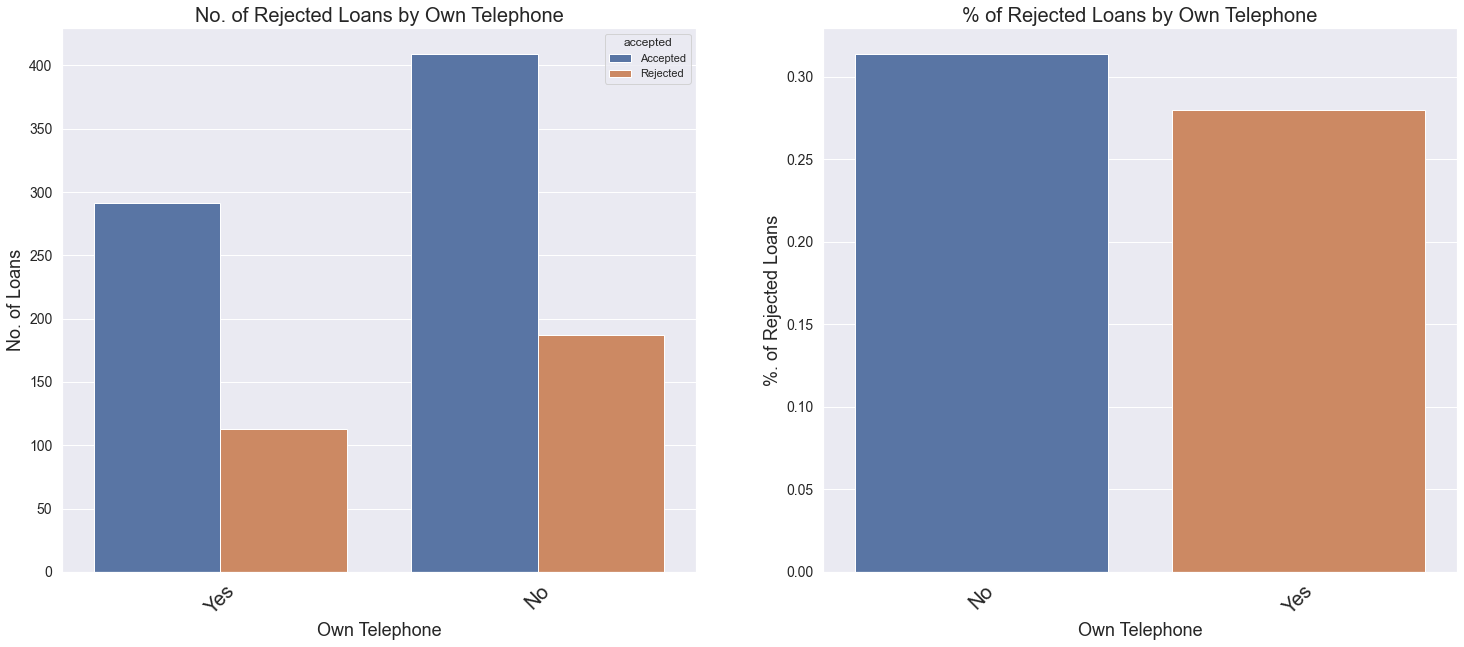

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('own_telephone', 'Own Telephone', 'No. of Loans', 'No. of Rejected Loans by Own Telephone')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('own_telephone', 'Own Telephone', '%. of Rejected Loans', '% of Rejected Loans by Own Telephone')
plt.xticks(rotation=45, fontsize=20)

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

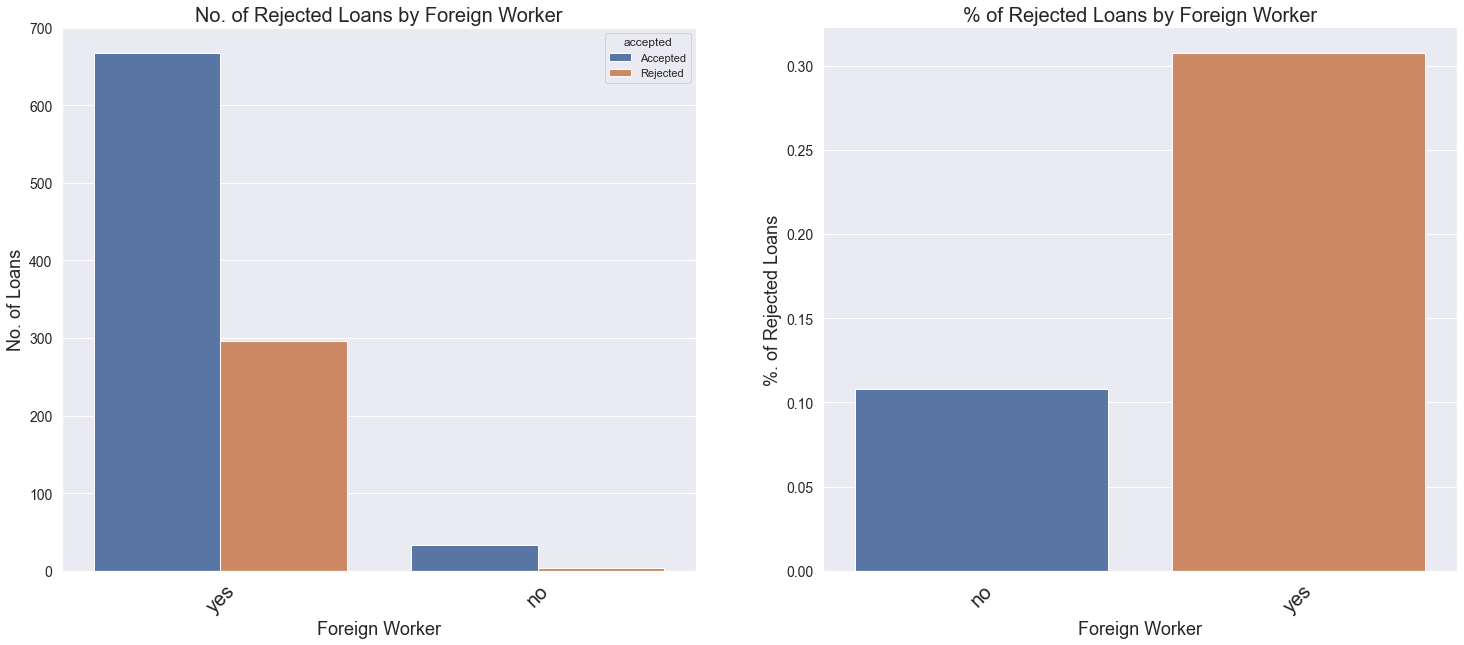

In [ ]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
createCountPlot('foreign_worker', 'Foreign Worker', 'No. of Loans', 'No. of Rejected Loans by Foreign Worker')
plt.xticks(rotation=45, fontsize=20)

plt.subplot(1,2,2)
createPercPlot('foreign_worker', 'Foreign Worker', '%. of Rejected Loans', '% of Rejected Loans by Foreign Worker')
plt.xticks(rotation=45, fontsize=20)

### Bivariate analysis

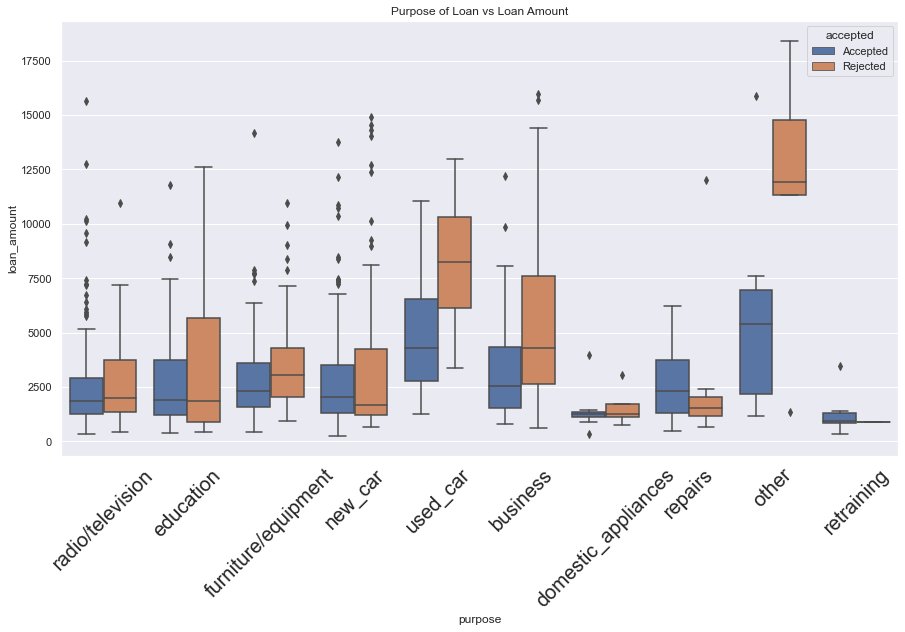

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data =df, x='purpose', y='loan_amount', hue ='accepted')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

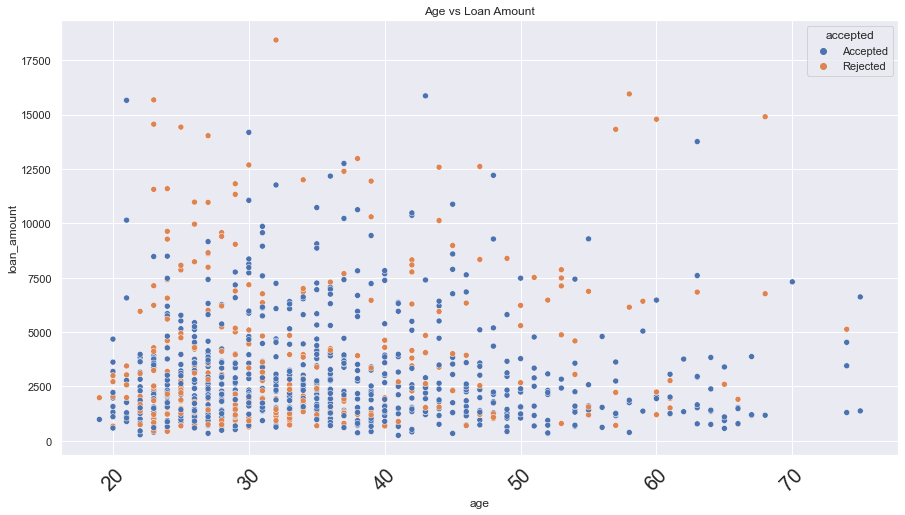

In [ ]:

plt.figure(figsize=(15,8))
sns.scatterplot(x='age',y='loan_amount',hue='accepted',data=df)
plt.title('Age vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

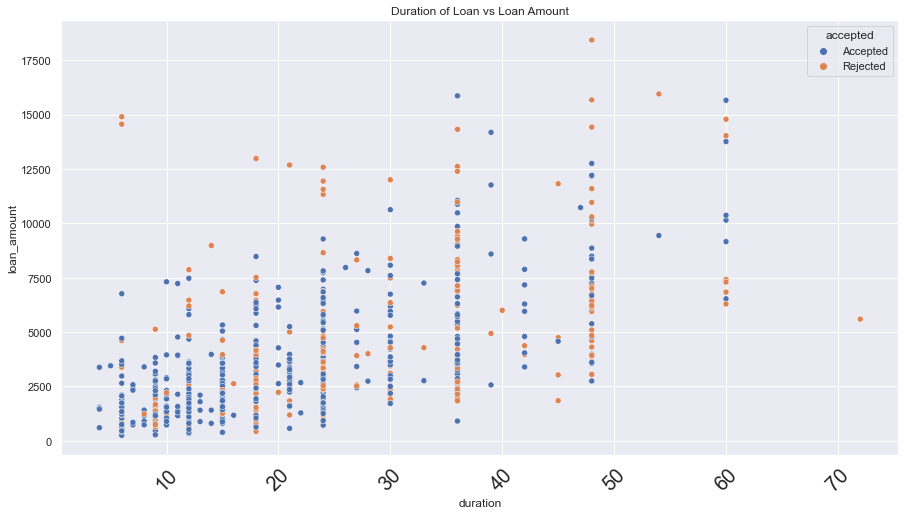

In [ ]:

plt.figure(figsize=(15,8))
sns.scatterplot(x='duration',y='loan_amount',hue='accepted',data=df)
plt.title('Duration of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

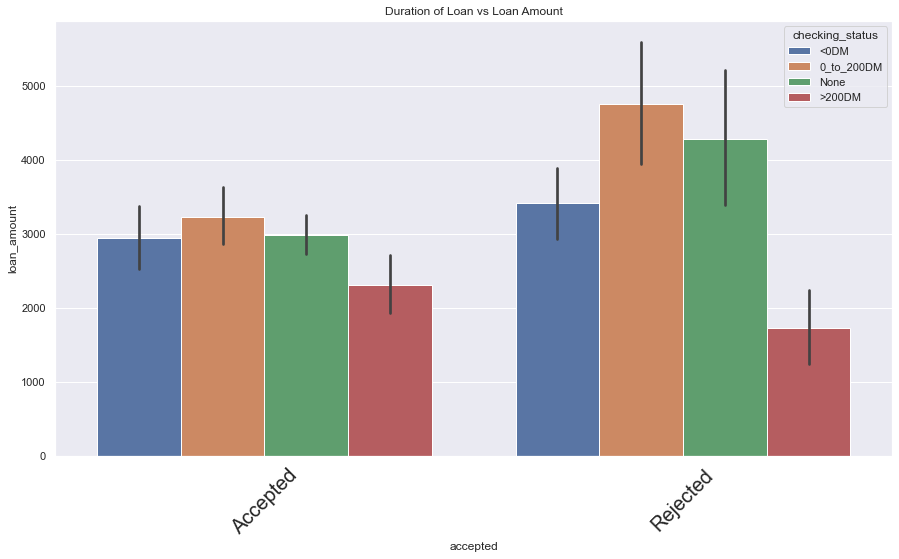

In [ ]:

plt.figure(figsize=(15,8))
sns.barplot(x='accepted',y='loan_amount',hue='checking_status',data=df)
plt.title('Checking status vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()


<Figure size 1080x576 with 0 Axes>

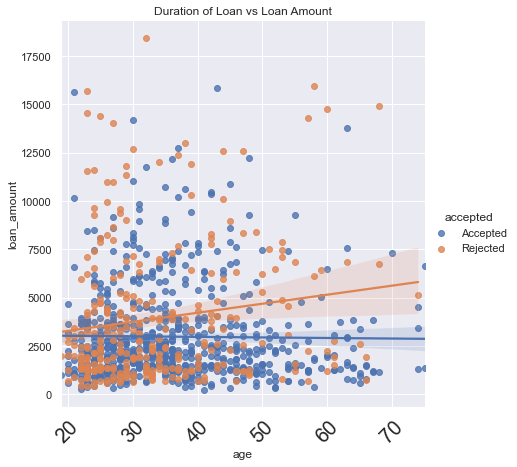

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(x='age',y='loan_amount',hue='accepted',data=df,height=6, aspect=1)
plt.title('Duration of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

<Figure size 1080x576 with 0 Axes>

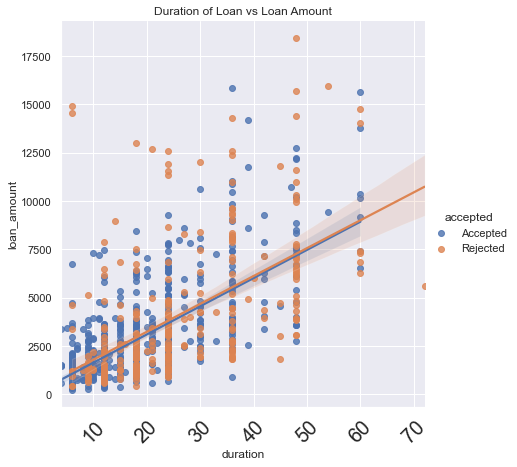

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(x='duration',y='loan_amount',hue='accepted',data=df,height=6, aspect=1)
plt.title('Duration of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()

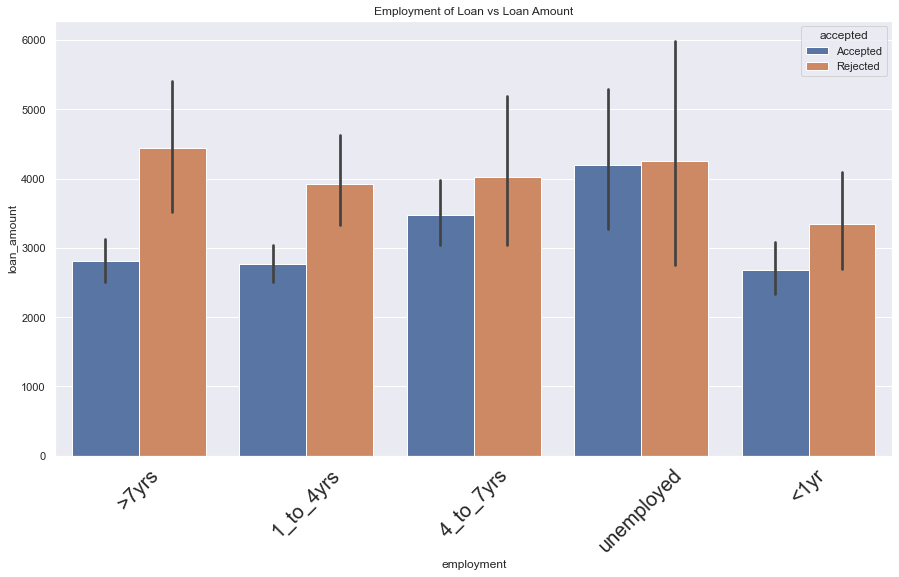

In [ ]:

plt.figure(figsize=(15,8))
sns.barplot(x='employment',y='loan_amount',hue='accepted',data=df)
plt.title('Employment of Loan vs Loan Amount')
plt.xticks(rotation = 45, fontsize=20)
plt.show()


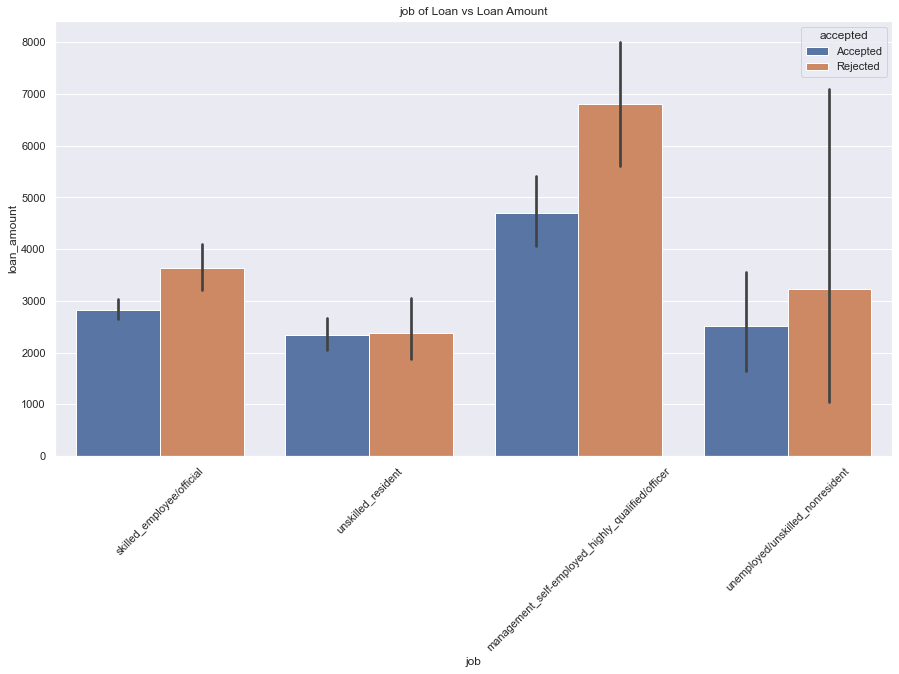

In [ ]:

plt.figure(figsize=(15,8))
sns.barplot(x='job',y='loan_amount',hue='accepted',data=df)
plt.title('job of Loan vs Loan Amount')
plt.xticks(rotation = 45)
plt.show()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Unknown_or_no_savings_acct'),
  Text(1, 0, '<100DM'),
  Text(2, 0, '500_to_1000DM'),
  Text(3, 0, '>1000DM'),
  Text(4, 0, '100_to_500DM')])

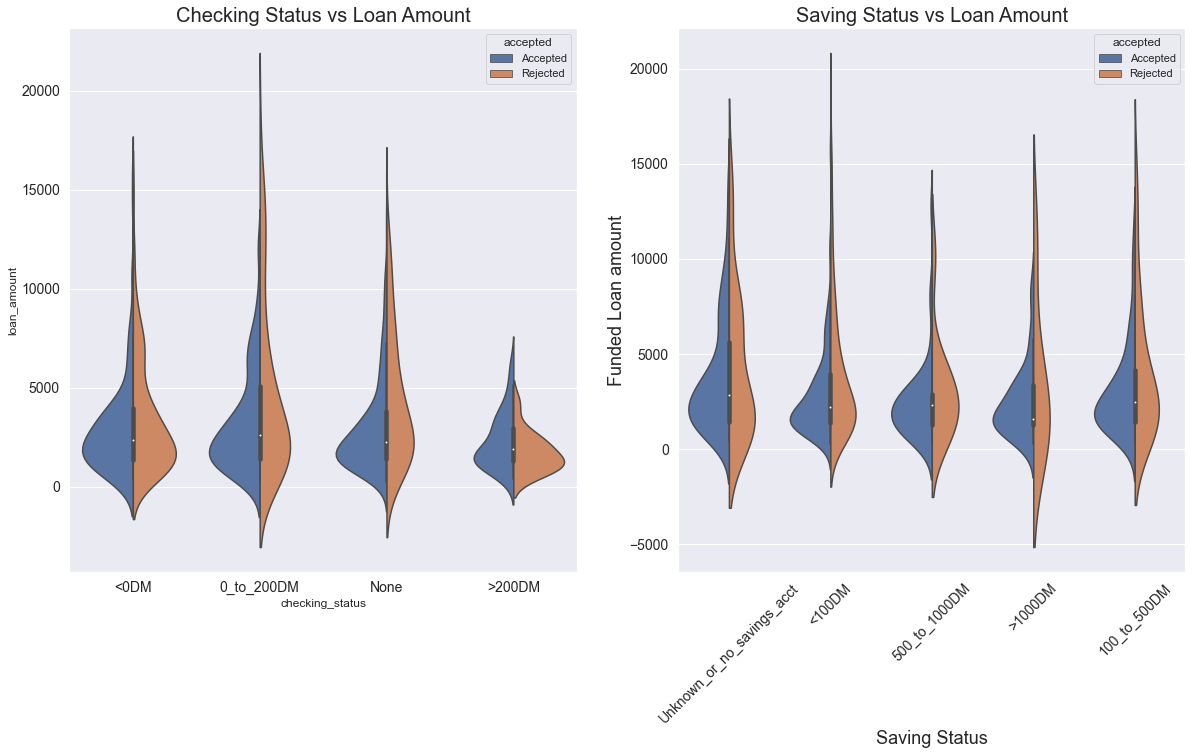

In [ ]:
fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plot1 = sns.violinplot(x="checking_status", y="loan_amount", data=df, hue='accepted',split=True,ax=ax1 )
plot2 = sns.violinplot(x="savings_status", y="loan_amount", data=df, hue='accepted',split=True,ax=ax2 )
setLabels(plot1, 'Checking Status', 'Fun`bded Loan amount', 'Checking Status vs Loan Amount')
setLabels(plot2, 'Saving Status', 'Funded Loan amount', 'Saving Status vs Loan Amount')
plt.xticks(rotation = 45)

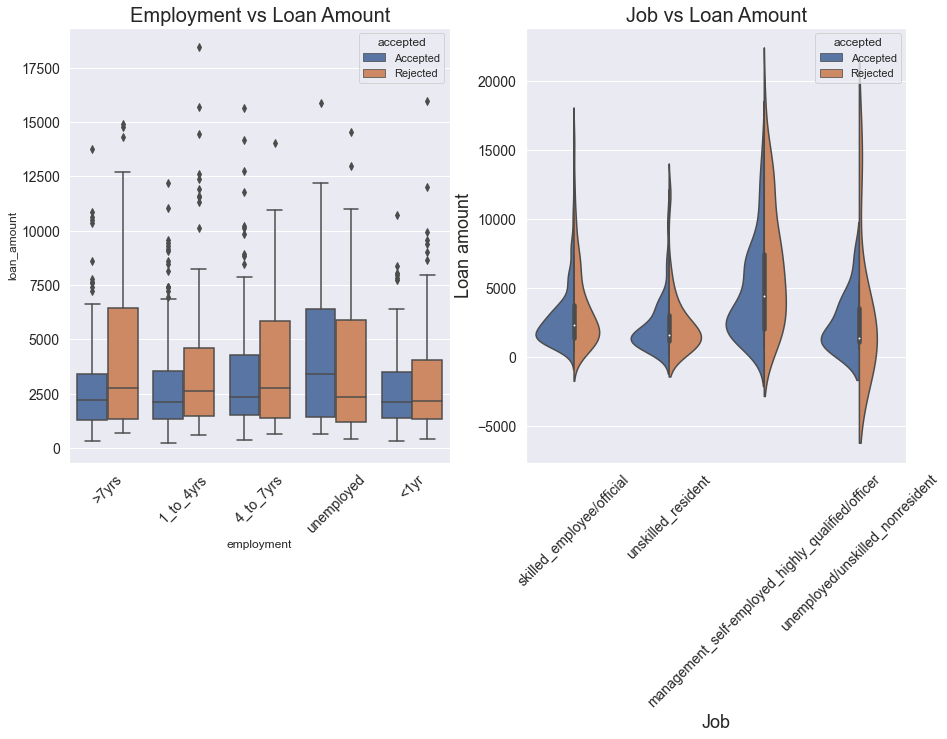

In [ ]:
fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plot1 = sns.boxplot(data =df, x='employment', y='loan_amount', hue ='accepted',ax=ax1)

setLabels(plot1, 'Employment', 'Loan amount', 'Employment vs Loan Amount')
plt.sca(ax1)
plt.xticks(rotation=45, fontsize=14)
# plt.yticks(fontsize=14)

plot2 = sns.violinplot(x="job", y="loan_amount", data=df, hue='accepted',split=True,ax=ax2 )
plt.sca(ax2)
plt.xticks(rotation=45, fontsize =14)
# plt.yticks(fontsize=14)
setLabels(plot2, 'Job', 'Loan amount', 'Job vs Loan Amount')

### Modeling

In [ ]:
df_model = df[['age','checking_status','duration','loan_amount','installment_commitment','accepted']]

In [ ]:
df_model['accepted'] = df['accepted'].apply(lambda x: 0 if x=='Rejected' else 1)

In [ ]:
checking_status_rates = pd.DataFrame(df_model['checking_status'].value_counts(normalize=True))

In [ ]:
df_model = pd.merge(df_model,checking_status_rates,left_on='checking_status',right_on=checking_status_rates.index)

In [ ]:
df_model.drop(['checking_status','checking_status_x'],axis=1,inplace=True)

In [ ]:
df_model.rename({'checking_status_y':'checking_status'},axis=1,inplace=True)

In [ ]:
df_model

,age,duration,loan_amount,installment_commitment,accepted,checking_status
0,67,6,1169,4,1,0.274
1,45,42,7882,2,1,0.274
2,53,24,4870,3,0,0.274
3,24,48,4308,3,0,0.274
4,60,24,1199,4,0,0.274
...,...,...,...,...,...,...
995,28,9,745,3,0,0.063
996,49,30,3656,4,1,0.063
997,57,24,1258,3,1,0.063
998,28,21,2923,1,1,0.063


In [ ]:
df_model_correlation = df_model.select_dtypes(exclude=["object"]).corr()
df_model_correlation

,age,duration,loan_amount,installment_commitment,accepted,checking_status
age,1.000000,-0.036136,0.032716,0.058266,0.091127,0.022192
duration,-0.036136,1.000000,0.624984,0.074749,-0.214927,-0.000004
loan_amount,0.032716,0.624984,1.000000,-0.271316,-0.154739,0.029862
installment_commitment,0.058266,0.074749,-0.271316,1.000000,-0.072404,0.043081
accepted,0.091127,-0.214927,-0.154739,-0.072404,1.000000,0.196377
checking_status,0.022192,-0.000004,0.029862,0.043081,0.196377,1.000000


<AxesSubplot:>

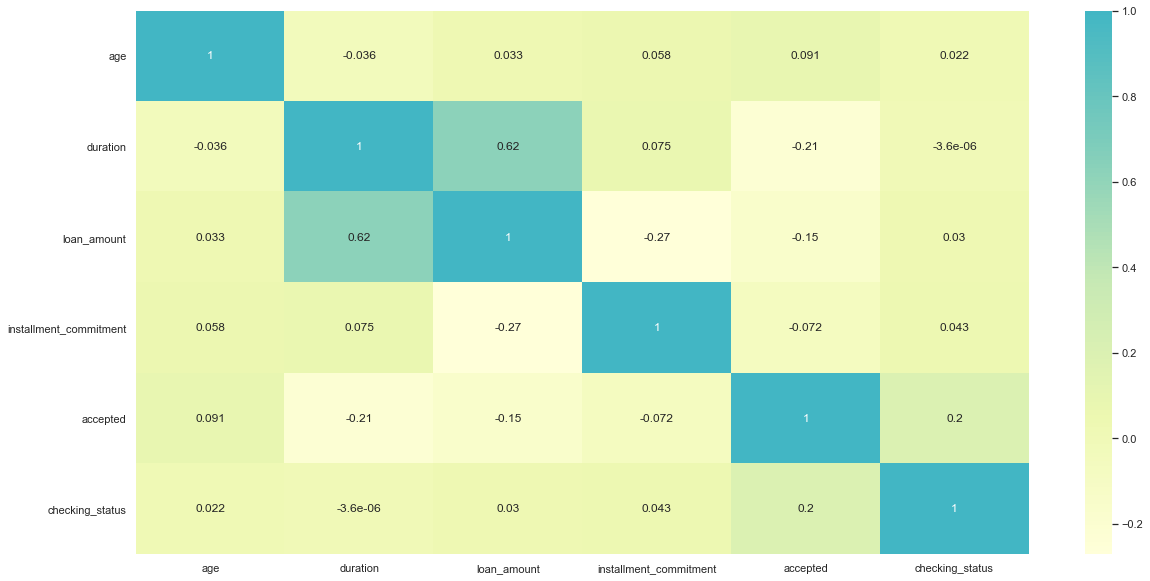

In [ ]:
plt.figure(figsize=(20, 10))
cols = df_model.columns.values

sns.heatmap(df_model_correlation,xticklabels=cols,yticklabels=cols,annot= True,center=1,cmap="YlGnBu")


In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import accuracy_score,auc, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df_model.drop(['accepted'], axis = 1)
y = df_model['accepted']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100,class_weight = 'balanced')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.7533333333333333
Recall: 0.9095238095238095
Precision: 0.7764227642276422
F1 score 0.837719298245614


In [ ]:
# Build GridSearchCV to find optimal hyperparameters
model = RandomForestClassifier(class_weight = "balanced", n_jobs = -1)
params = {'n_estimators':[50,100, 150, 250],
          'max_features':[0.3, 0.5, 0.7],
          'max_depth':[4, 6, 9]
          }
n_folds = StratifiedKFold(n_splits = 5, random_state = 100)
gridmodel = GridSearchCV(estimator = model,
                         param_grid = params,
                         cv = n_folds,
                         scoring = 'f1',
                         n_jobs = -1)

In [ ]:
gridmodel.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 9],
                         'max_features': [0.3, 0.5, 0.7],
                         'n_estimators': [50, 100, 150, 250]},
             scoring='f1')

In [ ]:
gridmodel.best_params_

{'max_depth': 9, 'max_features': 0.3, 'n_estimators': 100}

In [ ]:
cv_results = pd.DataFrame(gridmodel.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154986,0.006723,0.109912,0.001168,4,0.3,50,"{'max_depth': 4, 'max_features': 0.3, 'n_estim...",0.797980,0.670659,0.735632,0.728324,0.752809,0.737081,0.041102,26
1,0.356648,0.032362,0.114096,0.003001,4,0.3,100,"{'max_depth': 4, 'max_features': 0.3, 'n_estim...",0.793814,0.662577,0.768362,0.701754,0.764045,0.738110,0.048410,25
2,0.508263,0.079256,0.114712,0.005115,4,0.3,150,"{'max_depth': 4, 'max_features': 0.3, 'n_estim...",0.785340,0.654321,0.750000,0.728324,0.754286,0.734454,0.044007,28
3,0.721371,0.038719,0.118314,0.007499,4,0.3,250,"{'max_depth': 4, 'max_features': 0.3, 'n_estim...",0.785714,0.670732,0.752809,0.727273,0.742857,0.735877,0.037781,27
4,0.177670,0.019705,0.120669,0.003118,4,0.5,50,"{'max_depth': 4, 'max_features': 0.5, 'n_estim...",0.785340,0.658537,0.761364,0.686391,0.744186,0.727163,0.047363,33
5,0.338070,0.018388,0.119642,0.002035,4,0.5,100,"{'max_depth': 4, 'max_features': 0.5, 'n_estim...",0.763441,0.654321,0.754286,0.698225,0.765714,0.727197,0.044003,32
6,0.487499,0.012269,0.124791,0.009565,4,0.5,150,"{'max_depth': 4, 'max_features': 0.5, 'n_estim...",0.760870,0.674699,0.729412,0.690476,0.763006,0.723692,0.035956,35
7,0.769200,0.028930,0.116614,0.003204,4,0.5,250,"{'max_depth': 4, 'max_features': 0.5, 'n_estim...",0.793651,0.650307,0.744186,0.682635,0.748538,0.723863,0.050995,34
8,0.187247,0.031245,0.117080,0.001198,4,0.7,50,"{'max_depth': 4, 'max_features': 0.7, 'n_estim...",0.784946,0.658537,0.750000,0.678571,0.767442,0.727899,0.050102,31
9,0.336453,0.019858,0.115413,0.000196,4,0.7,100,"{'max_depth': 4, 'max_features': 0.7, 'n_estim...",0.789189,0.654545,0.748538,0.697674,0.770115,0.732012,0.049344,30


In [ ]:
cv_results[cv_results['rank_test_score']==1]['params'].values

array([{'max_depth': 9, 'max_features': 0.3, 'n_estimators': 100}],
      dtype=object)

In [ ]:
#### Build a random forest model with the best parameters

In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_depth= 9, max_features= 0.3,class_weight = 'balanced')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.75
Recall: 0.8428571428571429
Precision: 0.8082191780821918
F1 score 0.8251748251748252


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[ 48,  42],
       [ 33, 177]], dtype=int64)

0.84

0.8247272727272728

In [ ]:
precision

In [ ]:
#### After tuning the hyperparameters, model accuracy has significantly improved. As this is a class imbalance problem, decision threshold needs to be adjusted accordingly.

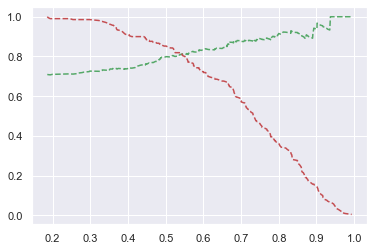

In [ ]:
y_test_prob = rf.predict_proba(x_test)
p, r, threshold = precision_recall_curve(y_test, y_test_prob[:,1])
plt.plot(threshold, p[:-1], "g--")
plt.plot(threshold, r[:-1], "r--")

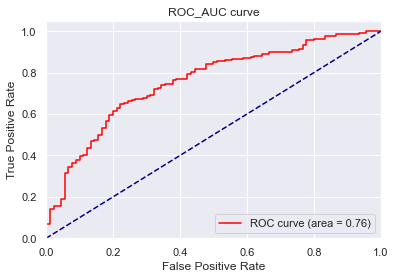

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_test_prob[:,1], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='red',
         label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#### Observing the precision-recall curve, it appears that the ideal threshold for this data is around 0.2 to 0.4. Let's try that.

In [ ]:
thres_df = pd.DataFrame({'y_test':y_test, 'y_predicted_prob':y_test_prob[:,1]})
label_cols = ['y_label_45','y_label_48', 'y_label_50', 'y_label_55', 'y_label_60']
for enum, i in enumerate([0.45,0.48, 0.50, 0.55,0.60]):
    thres_df[label_cols[enum]] = thres_df['y_predicted_prob'].map(lambda x : 1 if (x > i) else 0)
thres_df.head()

,y_test,y_predicted_prob,y_label_45,y_label_48,y_label_50,y_label_55,y_label_60
637,1,0.582090,1,1,1,1,0
334,1,0.700301,1,1,1,1,1
427,1,0.668425,1,1,1,1,1
14,0,0.469999,1,0,0,0,0
713,1,0.901647,1,1,1,1,1


In [ ]:
confusion = confusion_matrix(thres_df.y_test, thres_df.y_label_45)
print(confusion)
precision = round((confusion[1,1]/(confusion[1,1]+confusion[0,1])),2)
recall = round((confusion[1,1]/(confusion[1,1]+confusion[1,0])),2)
specificity = round((confusion[0,0]/(confusion[0,0]+confusion[0,1])),2)
f1=2*((precision*recall)/(precision+recall))
print(recall)
print(specificity)
print(f1)

[[ 33  57]
 [ 25 185]]
0.88
0.37
0.815609756097561


In [ ]:
confusion = confusion_matrix(thres_df.y_test, thres_df.y_label_50)
print(confusion)
precision = round((confusion[1,1]/(confusion[1,1]+confusion[0,1])),2)
recall = round((confusion[1,1]/(confusion[1,1]+confusion[1,0])),2)
specificity = round((confusion[0,0]/(confusion[0,0]+confusion[0,1])),2)
f1=2*((precision*recall)/(precision+recall))
print(recall)
print(specificity)
print(f1)

[[ 45  45]
 [ 31 179]]
0.85
0.5
0.8242424242424243


In [ ]:
confusion = confusion_matrix(thres_df.y_test, thres_df.y_label_55)
print(confusion)
precision = round((confusion[1,1]/(confusion[1,1]+confusion[0,1])),2)
recall = round((confusion[1,1]/(confusion[1,1]+confusion[1,0])),2)
specificity = round((confusion[0,0]/(confusion[0,0]+confusion[0,1])),2)
f1=2*((precision*recall)/(precision+recall))
print(recall)
print(specificity)
print(f1)

[[ 51  39]
 [ 42 168]]
0.8
0.57
0.804968944099379


In [ ]:
confusion = confusion_matrix(thres_df.y_test, thres_df.y_label_60)
print(confusion)
precision = round((confusion[1,1]/(confusion[1,1]+confusion[0,1])),2)
recall = round((confusion[1,1]/(confusion[1,1]+confusion[1,0])),2)
specificity = round((confusion[0,0]/(confusion[0,0]+confusion[0,1])),2)
f1=2*((precision*recall)/(precision+recall))
print(recall)
print(specificity)
print(f1)

[[ 60  30]
 [ 59 151]]
0.72
0.67
0.7710967741935484


In [ ]:
!pip install pycaret pandas shap

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\s795223\AppData\Local\Continuum\anaconda3\envs\notam\python.exe' 'C:\Users\s795223\AppData\Local\Continuum\anaconda3\envs\notam\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\s795223\AppData\Local\Temp\tmpdmu5zy5j'
       cwd: C:\Users\s795223\AppData\Local\Temp\pip-install-42amq2g5\bottleneck
  Complete output (51 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\bottleneck
  copying bottleneck\_pytesttester.py -> build\lib.win-amd64-3.7\bottleneck
  copying bottleneck\_version.py -> build\lib.win-amd64-3.7\bottleneck
  copying bottleneck\__init__.py -> build\lib.win-amd64-3.7\bottleneck
  creating build\lib.win-amd64-3.7\bottleneck\benchmark
  copying bottleneck\benchmark\autotimeit.py -> build\lib.win-amd64-3.7\bottleneck\benchmark
  copying bottleneck\benchmark\bench.py -> build\lib.w


  Using cached pycaret-2.3.3-py3-none-any.whl (264 kB)
  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached lightgbm-3.2.1-py3-none-win_amd64.whl (1.0 MB)
Processing c:\users\s795223\appdata\local\pip\cache\wheels\e1\27\13\3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0\cufflinks-0.17.3-py3-none-any.whl
  Using cached kmodes-0.11.0-py2.py3-none-any.whl (18 kB)
  Using cached wordcloud-1.8.1-cp37-cp37m-win_amd64.whl (154 kB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)
  Using cached mlflow-1.20.2-py3-none-any.whl (14.6 MB)
Processing c:\users\s795223\appdata\local\pip\cache\wheels\ac\94\65\d29b87d4ad6defcec32686063e9bbaf5907a259eb2d8342174\pyod-0.9.3-py3-none-any.whl
  Using cached mlxtend-0.19.0-p

  copying bottleneck\tests\list_input_test.py -> build\lib.win-amd64-3.7\bottleneck\tests
  copying bottleneck\tests\memory_test.py -> build\lib.win-amd64-3.7\bottleneck\tests
  copying bottleneck\tests\move_test.py -> build\lib.win-amd64-3.7\bottleneck\tests
  copying bottleneck\tests\nonreduce_axis_test.py -> build\lib.win-amd64-3.7\bottleneck\tests
  copying bottleneck\tests\nonreduce_test.py -> build\lib.win-amd64-3.7\bottleneck\tests
  copying bottleneck\tests\reduce_test.py -> build\lib.win-amd64-3.7\bottleneck\tests
  copying bottleneck\tests\scalar_input_test.py -> build\lib.win-amd64-3.7\bottleneck\tests
  copying bottleneck\tests\util.py -> build\lib.win-amd64-3.7\bottleneck\tests
  copying bottleneck\tests\__init__.py -> build\lib.win-amd64-3.7\bottleneck\tests
  UPDATING build\lib.win-amd64-3.7\bottleneck/_version.py
  set build\lib.win-amd64-3.7\bottleneck/_version.py to '1.3.2'
  running build_ext
  running config
  compiling '_configtest.c':
  
  
  
  int __attribute__(


  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached visions-0.7.1-py3-none-any.whl (102 kB)
  Using cached pydantic-1.8.2-cp37-cp37m-win_amd64.whl (1.9 MB)
Processing c:\users\s795223\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655\htmlmin-0.1.12-py3-none-any.whl
  Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl (3.1 MB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached phik-0.12.0-cp37-cp37m-win_amd64.whl (660 kB)
  Using cached docker-5.0.2-py2.py3-none-any.whl (145 kB)
  Using cached SQLAlchemy-1.4.23-cp37-cp37m-win_amd64.whl (1.5 MB)
  Using cached importlib_metadata-4.8.1-py3-none-any.whl (17 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached GitPython-3.1.24-py3-none-any.whl (180 kB)
  Using cached sqlparse-0.4.2-py3-none-any.whl (42 kB)
Processing c:\users\s795223\appdata\local\pip\cache\whee